# Weather Trend Forecasting (India)

`PM Accelerator Mission`: "To empower more kids for a better future in their life and career, simultaneously, fostering a diverse landscape in the tech industry."


## Objective

To forecast future temperature trends for India using historical weather data
and compare statistical (SARIMAX) and additive (Prophet) time-series models
using both visual and error-based evaluation.
## Dataset
- Source: Global Weather Repository (Kaggle)
- Granularity: Daily weather data


## 1. Data Acquisition
The dataset is downloaded directly from Kaggle using the Kaggle API.

In [3]:
!kaggle datasets download -d nelgiriyewithana/global-weather-repository


Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository
License(s): other
  0% 0.00/8.92M [00:00<?, ?B/s]
100% 8.92M/8.92M [00:00<00:00, 914MB/s]


In [4]:
!unzip global-weather-repository.zip

Archive:  global-weather-repository.zip
  inflating: GlobalWeatherRepository.csv  
  inflating: state.db                


## Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Loading
Load the weather dataset into a Pandas DataFrame for exploration and preprocessing.


In [6]:
df=pd.read_csv("GlobalWeatherRepository.csv")

In [7]:
print('columns in dataset are:')
df.columns

columns in dataset are:


Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

## 4. Feature Categorization
Features are separated into:
- Numerical columns (continuous values)
- Categorical columns (country, location, condition, etc.)


In [8]:
print('Numerical columns in dataset are:')
numerical_cols=df.select_dtypes(include=['number']).columns
numerical_cols

Numerical columns in dataset are:


Index(['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree',
       'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km',
       'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination'],
      dtype='object')

In [9]:
print('Categorical columns in dataset are:')
categorical_cols=df.columns[(df.dtypes=='object') | (df.dtypes=='category')]
categorical_cols

Categorical columns in dataset are:


Index(['country', 'location_name', 'timezone', 'last_updated',
       'condition_text', 'wind_direction', 'sunrise', 'sunset', 'moonrise',
       'moonset', 'moon_phase'],
      dtype='object')

## 3. Initial Data Exploration
This step helps understand:
- Dataset structure
- Column types
- Number of rows and columns
- Presence of missing values


In [10]:
df.head()

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy  ...                1.1   
2                    73.4          Sunny  ...               10.4   
3                    43.3  Light drizzle  ...                0.7   
4                    78.8  Partly cloudy  ...              183.4   

   air_quality_PM10  air_quality_us-epa-index air_quality_gb-defra-index  \
0              26.6                         1                          1   
1               2.0                         1                          1   
2              18.4                         1                          1   
3               0.9                         1                          1   
4             262.3                         5                         10   

    sunrise    sunset  moonrise   moonset      moon_phase  moon_illumination  
0  04:50 AM  06:50 PM  12:12 PM  01:11 AM  Waxing Gibbous                 55  
1  05:21 AM  07:54 PM  12:58 PM  02:14 AM  Waxing Gibbous                 55  
2  05:40 AM  07:50 PM  01:15 PM  02:14 AM  Waxing Gibbous                 55  
3  06:31 AM  09:11 PM  02:12 PM  03:31 AM  Waxing Gibbous                 55  
4  06:12 AM  05:55 PM  01:17 PM  12:38 AM  Waxing Gibbous                 55  

[5 rows x 41 columns]

In [11]:
df.tail(8)

country location_name  latitude  longitude            timezone  \
112635     Uruguay    Montevideo  -34.8581   -56.1708  America/Montevideo   
112636  Uzbekistan      Tashkent   41.3167    69.2500       Asia/Tashkent   
112637     Vanuatu     Port Vila  -17.7333   168.3167       Pacific/Efate   
112638   Venezuela       Caracas   10.5000   -66.9167     America/Caracas   
112639     Vietnam         Hanoi   21.0333   105.8500        Asia/Bangkok   
112640       Yemen         Sanaa   15.3547    44.2067           Asia/Aden   
112641      Zambia        Lusaka  -15.4167    28.2833       Africa/Lusaka   
112642    Zimbabwe        Harare  -17.8178    31.0447       Africa/Harare   

        last_updated_epoch      last_updated  temperature_celsius  \
112635          1765869300  2025-12-16 04:15                 18.3   
112636          1765869300  2025-12-16 12:15                  8.1   
112637          1765869300  2025-12-16 18:15                 27.3   
112638          1765869300  2025-12-16 03:15                 25.4   
112639          1765869300  2025-12-16 14:15                 22.1   
112640          1765869300  2025-12-16 10:15                 16.9   
112641          1765869300  2025-12-16 09:15                 20.1   
112642          1765869300  2025-12-16 09:15                 22.1   

        temperature_fahrenheit                 condition_text  ...  \
112635                    64.9                          Clear  ...   
112636                    46.6                       Overcast  ...   
112637                    81.1  Moderate or heavy rain shower  ...   
112638                    77.7                          Clear  ...   
112639                    71.8                       Overcast  ...   
112640                    62.4                          Sunny  ...   
112641                    68.2             Patchy rain nearby  ...   
112642                    71.8                          Sunny  ...   

        air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
112635               5.95              8.55                         1   
112636              16.15             16.75                         2   
112637               4.65              6.65                         1   
112638              14.25             16.35                         1   
112639             102.85            103.25                         4   
112640              14.45             22.75                         1   
112641               5.95              5.95                         1   
112642              11.25             11.55                         1   

       air_quality_gb-defra-index   sunrise    sunset  moonrise   moonset  \
112635                          1  05:26 AM  07:55 PM  02:42 AM  05:11 PM   
112636                          2  07:43 AM  04:55 PM  04:16 AM  02:07 PM   
112637                          1  05:07 AM  06:18 PM  01:54 AM  03:04 PM   
112638                          2  06:38 AM  06:09 PM  03:43 AM  03:30 PM   
112639                         10  06:26 AM  05:18 PM  03:04 AM  02:21 PM   
112640                          2  06:22 AM  05:36 PM  03:11 AM  02:44 PM   
112641                          1  05:32 AM  06:34 PM  02:31 AM  03:40 PM   
112642                          1  05:16 AM  06:27 PM  02:16 AM  03:33 PM   

             moon_phase  moon_illumination  
112635  Waning Crescent                 14  
112636  Waning Crescent                 16  
112637  Waning Crescent                 17  
112638  Waning Crescent                 13  
112639  Waning Crescent                 16  
112640  Waning Crescent                 15  
112641  Waning Crescent                 15  
112642  Waning Crescent                 15  

[8 rows x 41 columns]

In [12]:
df.shape

(112643, 41)

In [13]:
df.describe()

latitude     longitude  last_updated_epoch  temperature_celsius  \
count  112643.000000  112643.00000        1.126430e+05        112643.000000   
mean       19.178250      22.01720        1.740917e+09            22.291916   
std        24.437771      65.79617        1.446210e+07             9.018318   
min       -41.300000    -175.20000        1.715849e+09           -24.900000   
25%         3.750000      -6.83610        1.728467e+09            17.200000   
50%        17.250000      23.31670        1.740910e+09            24.300000   
75%        40.400000      50.58000        1.753432e+09            28.200000   
max        64.150000     179.22000        1.765869e+09            49.200000   

       temperature_fahrenheit       wind_mph       wind_kph    wind_degree  \
count           112643.000000  112643.000000  112643.000000  112643.000000   
mean                72.127234       8.111106      13.057097     170.125068   
std                 16.232785       7.554679      12.155298     102.907299   
min                -12.800000       2.200000       3.600000       1.000000   
25%                 63.000000       4.000000       6.500000      82.000000   
50%                 75.700000       6.900000      11.200000     163.000000   
75%                 82.800000      11.200000      18.000000     256.000000   
max                120.600000    1841.200000    2963.200000     360.000000   

         pressure_mb    pressure_in  ...       gust_kph  \
count  112643.000000  112643.000000  ...  112643.000000   
mean     1014.072912      29.944911  ...      18.305330   
std        10.862384       0.320723  ...      14.213187   
min       947.000000      27.960000  ...       3.600000   
25%      1010.000000      29.830000  ...      10.400000   
50%      1014.000000      29.930000  ...      15.600000   
75%      1018.000000      30.060000  ...      24.200000   
max      3006.000000      88.770000  ...    2970.400000   

       air_quality_Carbon_Monoxide  air_quality_Ozone  \
count                112643.000000      112643.000000   
mean                    492.603091          60.405397   
std                     808.564457          31.623178   
min                   -9999.000000           0.000000   
25%                     220.300000          40.000000   
50%                     312.650000          57.000000   
75%                     487.300000          77.000000   
max                   38879.398000         480.700000   

       air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
count                 112643.000000                112643.000000   
mean                      15.505415                    10.878587   
std                       25.024885                    38.403750   
min                        0.000000                 -9999.000000   
25%                        1.480000                     0.925000   
50%                        5.200000                     2.405000   
75%                       17.945000                     8.800000   
max                      427.700000                   521.330000   

       air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
count      112643.000000     112643.000000             112643.000000   
mean           25.046279         50.391970                  1.724270   
std            38.894821        155.486762                  0.960352   
min             0.168000      -1848.150000                  1.000000   
25%             7.215000         10.350000                  1.000000   
50%            14.600000         20.900000                  1.000000   
75%            28.490000         43.105000                  2.000000   
max          1614.100000       6037.290000                  6.000000   

       air_quality_gb-defra-index  moon_illumination  
count               112643.000000      112643.000000  
mean                     2.669087          49.977593  
std                      2.501199          34.993185  
min                      1.000000           0.000000  
25%           

In [14]:
df.describe(include=['category','object'])

country location_name      timezone      last_updated condition_text  \
count     112643        112643        112643            112643         112643   
unique       211           254           197             19319             47   
top     Bulgaria         Kabul  Asia/Bangkok  2025-01-23 11:30  Partly cloudy   
freq        1303           579          2145                44          34164   

       wind_direction   sunrise    sunset     moonrise     moonset  \
count          112643    112643    112643       112643      112643   
unique             16       477       545         1441        1441   
top                 E  05:57 AM  06:02 PM  No moonrise  No moonset   
freq            10659      1253      1142         3887        3692   

            moon_phase  
count           112643  
unique               8  
top     Waxing Gibbous  
freq             24771

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112643 entries, 0 to 112642
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   country                       112643 non-null  object 
 1   location_name                 112643 non-null  object 
 2   latitude                      112643 non-null  float64
 3   longitude                     112643 non-null  float64
 4   timezone                      112643 non-null  object 
 5   last_updated_epoch            112643 non-null  int64  
 6   last_updated                  112643 non-null  object 
 7   temperature_celsius           112643 non-null  float64
 8   temperature_fahrenheit        112643 non-null  float64
 9   condition_text                112643 non-null  object 
 10  wind_mph                      112643 non-null  float64
 11  wind_kph                      112643 non-null  float64
 12  wind_degree                   112643 non-nul

## 5. Data Cleaning & Preprocessing

### Steps Performed:
- Handling missing values
- Outlier detection using Z-score and IQR
- No normalization applied to preserve original scale


In [16]:
missing_values=df.isnull().sum()
missing_values

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Nitrogen_dioxide    0
air_quality_Sulphur_dioxide     0
air_quality_PM2.5               0
air_quality_PM10                0
air_quality_us-epa-index        0
air_quality_gb-defra-index      0
sunrise                         0
sunset                          0
moonrise                        0
moonset                         0
moon_phase                      0
moon_illumination               0
dtype: int64

In [17]:
print('No. of missing values in the dataset are:',missing_values.sum())
print('No. of duplicate rows in the dataset:',df.duplicated().sum())

No. of missing values in the dataset are: 0
No. of duplicate rows in the dataset: 0


In [18]:
print('No. of countries in the dataset:',df['country'].nunique())

No. of countries in the dataset: 211


In [19]:
sorted(df['country'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Bélgica',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Estonie',
 'Ethiopia',
 'Fiji Islands',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guya

In [20]:
df.groupby('country')['location_name'].unique()

country
Afghanistan               [Kabul]
Albania                  [Tirana]
Algeria                 [Algiers]
Andorra        [Andorra La Vella]
Angola                   [Luanda]
                      ...        
Гватемала         [New Guatemala]
Польша                   [Beirut]
Турция                    [Yaren]
كولومبيا             [Costa Rica]
火鸡                     [-Kingdom]
Name: location_name, Length: 211, dtype: object

In [21]:
locations=df.groupby(['country', 'location_name']).size().sort_values(ascending=False).reset_index(name='count')
locations

country     location_name  count
0         Zambia            Lusaka    579
1    Afghanistan             Kabul    579
2        Albania            Tirana    579
3        Andorra  Andorra La Vella    579
4         Tuvalu          Funafuti    579
..           ...               ...    ...
262    Гватемала     New Guatemala      1
263       Польша            Beirut      1
264       Турция             Yaren      1
265     كولومبيا        Costa Rica      1
266           火鸡          -Kingdom      1

[267 rows x 3 columns]

In [22]:
locations_with_stats = df.groupby(['country', 'location_name']).agg({
    'precip_mm': ['min', 'max', 'mean'],
    'temperature_celsius': ['min','max','mean'],
    'humidity':['min','max','mean'],
    'wind_kph':['min','max','mean'],
    'pressure_mb':['min','max','mean'],
    'uv_index':['min','max','mean'],
    'cloud':['min','max','mean']

}).reset_index()
locations_with_stats

country     location_name precip_mm                  \
                                         min   max      mean   
0    Afghanistan             Kabul      0.00  3.64  0.032884   
1        Albania            Tirana      0.00  5.34  0.136131   
2        Algeria           Algiers      0.00  2.37  0.036194   
3        Andorra  Andorra La Vella      0.00  5.97  0.118221   
4         Angola            Luanda      0.00  1.86  0.029206   
..           ...               ...       ...   ...       ...   
262    Гватемала     New Guatemala      0.00  0.00  0.000000   
263       Польша            Beirut      0.00  0.00  0.000000   
264       Турция             Yaren      0.00  0.00  0.000000   
265     كولومبيا        Costa Rica      0.05  0.05  0.050000   
266           火鸡          -Kingdom      0.00  0.00  0.000000   

    temperature_celsius                  humidity       ...   wind_kph  \
                    min   max       mean      min  max  ...       mean   
0                  -3.3  36.3  21.067358        4  100  ...   9.130052   
1                   1.3  39.2  21.694301       14  100  ...   9.029879   
2                   2.1  38.2  22.371280       23  100  ...  12.794983   
3                 -13.0  28.9  11.284629       14  100  ...   8.336960   
4                  19.3  32.2  26.156995       39  100  ...   9.441105   
..                  ...   ...        ...      ...  ...  ...        ...   
262                15.9  15.9  15.900000       95   95  ...   6.500000   
263                24.2  24.2  24.200000       56   56  ...  13.700000   
264                34.0  34.0  34.000000       44   44  ...  24.100000   
265                23.1  23.1  23.100000       95   95  ...   6.500000   
266                29.7  29.7  29.700000       24   24  ...  18.400000   

    pressure_mb                      uv_index                 cloud       \
            min     max         mean      min   max      mean   min  max   
0         992.0  1029.0  1009.879102      0.1  12.7  5.956822     0  100   
1         994.0  1037.0  1015.811744      0.0   9.0  3.852159     0  100   
2        1001.0  1040.0  1017.363322      0.0   8.0  3.105882     0  100   
3         996.0  1037.0  1018.079447      0.0   8.0  2.470984     0  100   
4        1007.0  1019.0  1013.056995      0.2  12.1  5.162349     0  100   
..          ...     ...          ...      ...   ...       ...   ...  ...   
262      1020.0  1020.0  1020.000000      4.0   4.0  4.000000    46   46   
263      1013.0  1013.0  1013.000000      5.0   5.0  5.000000    74   74   
264      1006.0  1006.0  1006.000000      8.0   8.0  8.000000    25   25   
265      1017.0  1017.0  1017.000000      5.0   5.0  5.000000    92   92   
266      1003.0  1003.0  1003.000000      7.0   7.0  7.000000     4    4   

                
          mean  
0    15.198618  
1    28.528497  
2    29.750865  
3    40.699482  
4    61.525043  
..         ...  
262  46.000000  
263  74.000000  
264  25.000000  
265  92.000000  
266   4.000000  

[267 rows x 23 columns]

In [23]:
df['condition_text'].unique()

array(['Partly Cloudy', 'Partly cloudy', 'Sunny', 'Light drizzle',
       'Clear', 'Overcast', 'Moderate or heavy rain with thunder',
       'Patchy light rain in area with thunder', 'Fog',
       'Patchy light rain with thunder', 'Patchy rain nearby',
       'Light rain', 'Mist', 'Cloudy', 'Thundery outbreaks in nearby',
       'Moderate rain', 'Light rain shower', 'Moderate rain at times',
       'Moderate or heavy rain shower', 'Heavy rain at times',
       'Patchy light rain', 'Patchy light drizzle',
       'Thundery outbreaks possible', 'Patchy rain possible',
       'Moderate or heavy rain in area with thunder', 'Heavy rain',
       'Torrential rain shower', 'Freezing fog',
       'Moderate or heavy snow showers', 'Light sleet', 'Blizzard',
       'Moderate snow', 'Light snow', 'Light sleet showers',
       'Light freezing rain', 'Heavy snow', 'Blowing snow',
       'Patchy heavy snow', 'Light snow showers',
       'Moderate or heavy sleet', 'Patchy light snow',
       'Patchy mo

In [24]:
df['condition_text'].nunique()

47

In [25]:
sorted(df['condition_text'].unique())

['Blizzard',
 'Blowing snow',
 'Clear',
 'Cloudy',
 'Fog',
 'Freezing drizzle',
 'Freezing fog',
 'Heavy rain',
 'Heavy rain at times',
 'Heavy snow',
 'Light drizzle',
 'Light freezing rain',
 'Light rain',
 'Light rain shower',
 'Light sleet',
 'Light sleet showers',
 'Light snow',
 'Light snow showers',
 'Mist',
 'Moderate or heavy rain in area with thunder',
 'Moderate or heavy rain shower',
 'Moderate or heavy rain with thunder',
 'Moderate or heavy sleet',
 'Moderate or heavy snow in area with thunder',
 'Moderate or heavy snow showers',
 'Moderate rain',
 'Moderate rain at times',
 'Moderate snow',
 'Overcast',
 'Partly Cloudy',
 'Partly cloudy',
 'Patchy heavy snow',
 'Patchy light drizzle',
 'Patchy light rain',
 'Patchy light rain in area with thunder',
 'Patchy light rain with thunder',
 'Patchy light snow',
 'Patchy light snow in area with thunder',
 'Patchy moderate snow',
 'Patchy rain nearby',
 'Patchy rain possible',
 'Patchy snow nearby',
 'Patchy snow possible',
 'Sun

In [26]:
df['moon_phase'].nunique()

8

In [27]:
df['moon_phase'].unique()

array(['Waxing Gibbous', 'Full Moon', 'Waning Gibbous', 'Last Quarter',
       'Waning Crescent', 'New Moon', 'Waxing Crescent', 'First Quarter'],
      dtype=object)

In [28]:
df['wind_direction'].nunique()

16

In [29]:
df['wind_direction'].unique()

array(['NNW', 'NW', 'W', 'SW', 'SSE', 'E', 'N', 'SE', 'ESE', 'NNE', 'S',
       'WSW', 'SSW', 'ENE', 'NE', 'WNW'], dtype=object)

## Weather Conditions across Countries

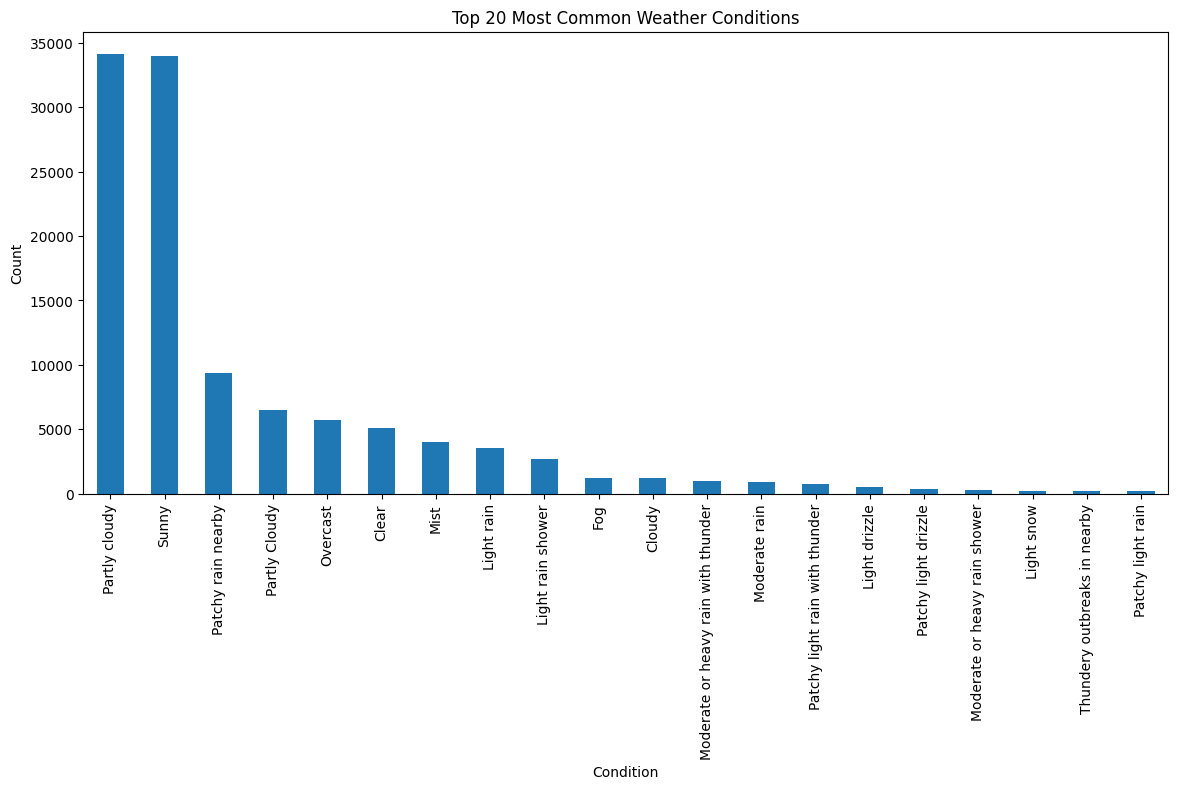

In [30]:
plt.figure(figsize=(14,6))
df['condition_text'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Most Common Weather Conditions")
plt.ylabel("Count")
plt.xlabel("Condition")
plt.show()

In [31]:
df.groupby('country')['temperature_celsius'].mean().sort_values(ascending=False)


country
Saudi Arabien               45.000000
Marrocos                    40.300000
Turkménistan                37.800000
Qatar                       34.005536
Турция                      34.000000
                              ...    
Norway                       9.369204
United States of America     9.157941
Canada                       7.129687
Iceland                      6.395156
Mongolia                     6.163258
Name: temperature_celsius, Length: 211, dtype: float64

In [32]:
country_cities=df.groupby('country')['location_name'].nunique().sort_values(ascending=False)
country_cities

country
Paraguay     6
Belgium      5
Indonesia    4
Palau        4
Cameroon     4
            ..
Гватемала    1
Польша       1
Турция       1
كولومبيا     1
火鸡           1
Name: location_name, Length: 211, dtype: int64

In [33]:
df['last_updated'] = pd.to_datetime(df['last_updated'])
daily_temp = df.set_index('last_updated',inplace=False)['temperature_celsius'].resample('D').mean()

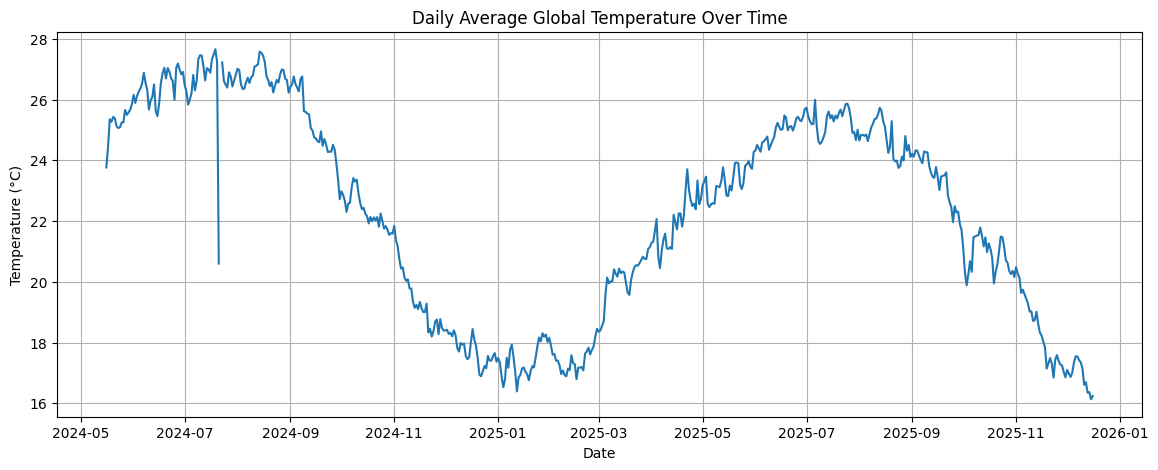

In [34]:

plt.figure(figsize=(14,5))
plt.plot(daily_temp)
plt.title("Daily Average Global Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.show()


### Environmental Impact

Analyze air quality and its correlation with various weather parameters.


In [35]:
df_ind = df[df['country'] == 'India'].copy()


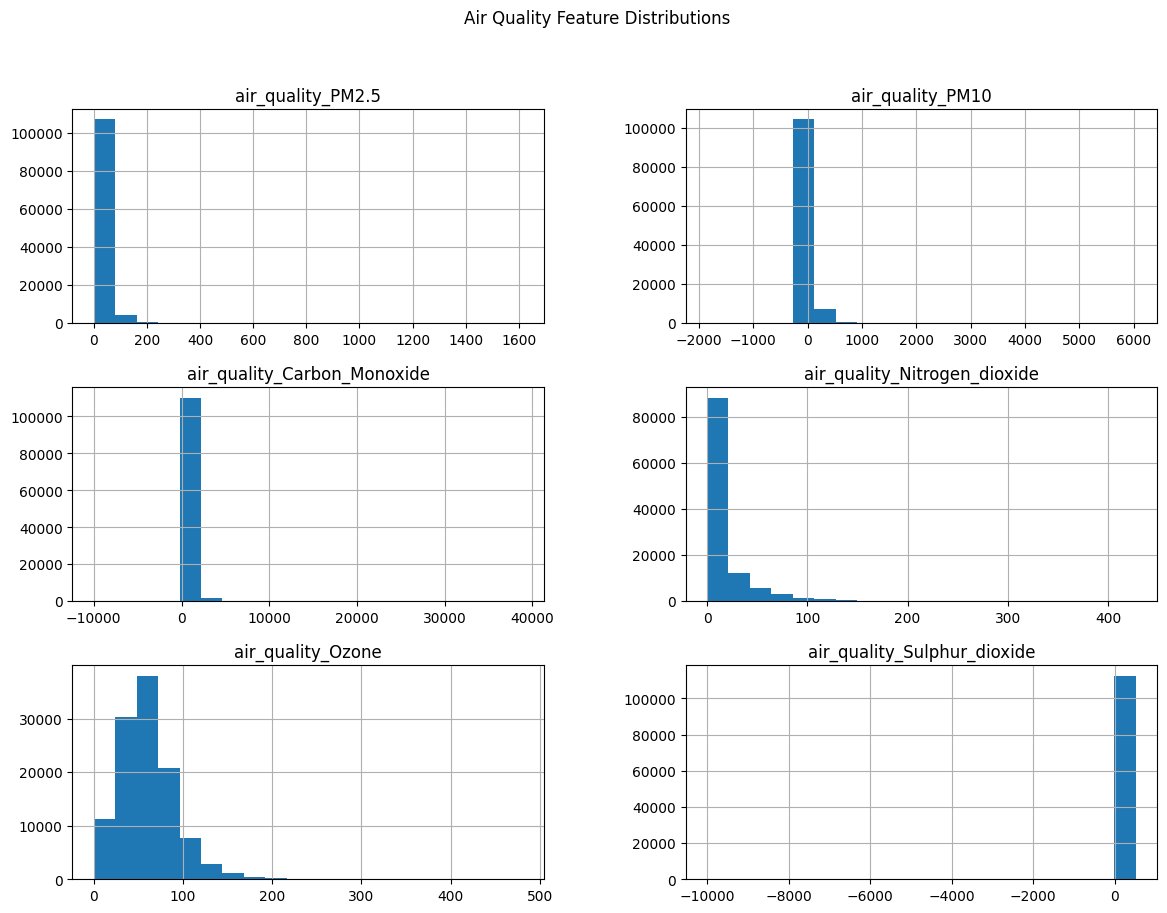

In [36]:

air_quality_cols = [
    'air_quality_PM2.5',
    'air_quality_PM10',
    'air_quality_Carbon_Monoxide',
    'air_quality_Nitrogen_dioxide',
    'air_quality_Ozone',
    'air_quality_Sulphur_dioxide'
]


df[air_quality_cols].hist(figsize=(14,10), bins=20)
plt.suptitle("Air Quality Feature Distributions")
plt.show()


In [37]:
weather_cols = [
    'temperature_celsius',
    'humidity',
    'wind_kph',
    'precip_mm',
    'pressure_mb'
]


In [38]:
env_df = df_ind[air_quality_cols + weather_cols].dropna()


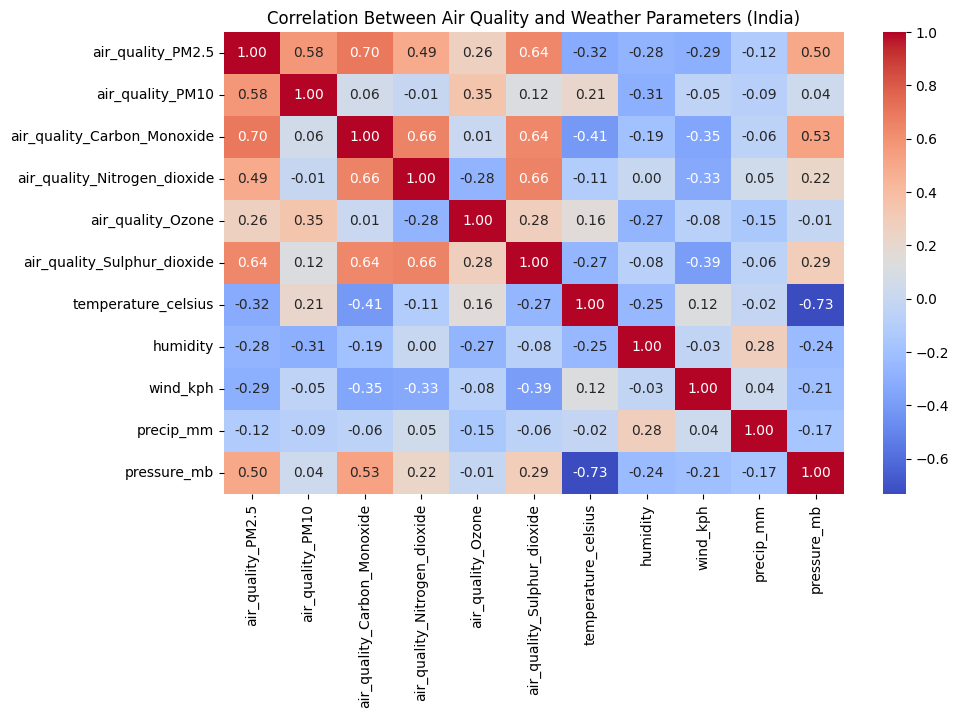

In [39]:
corr_matrix = env_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Between Air Quality and Weather Parameters (India)")
plt.show()


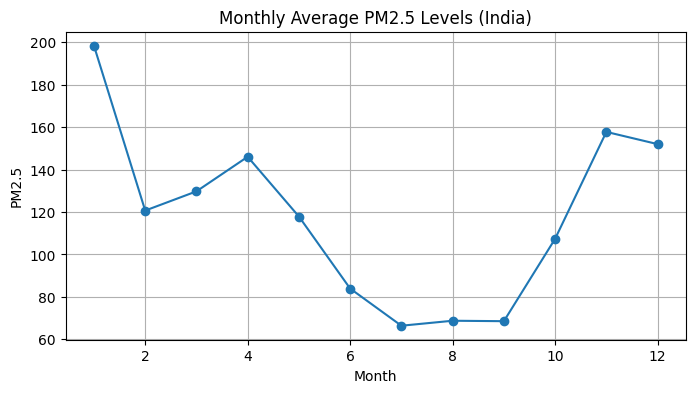

In [40]:
df_ind['month'] = df_ind['last_updated'].dt.month

monthly_air_quality = (
    df_ind.groupby('month')['air_quality_PM2.5']
    .mean()
)

plt.figure(figsize=(8,4))
monthly_air_quality.plot(marker='o')
plt.title("Monthly Average PM2.5 Levels (India)")
plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.grid()
plt.show()


## Environmental Impact Analysis: Air Quality and Weather Interaction

To study environmental impact, correlations between air quality indicators
(PM2.5, PM10, CO, NO₂, and O₃) and meteorological variables were analyzed.
The results show that air pollution levels are strongly influenced by
weather conditions.

PM2.5 and PM10 exhibit negative correlation with wind speed and
precipitation, indicating effective pollutant dispersion and washout
during windy or rainy conditions. Humidity shows a positive correlation
with particulate matter, suggesting moisture-driven pollutant retention.
Seasonal analysis further reveals higher pollution levels during specific
months, reflecting climatic and atmospheric conditions.

These findings highlight the critical role of weather in air quality
dynamics and emphasize the environmental impact of climatic variability.


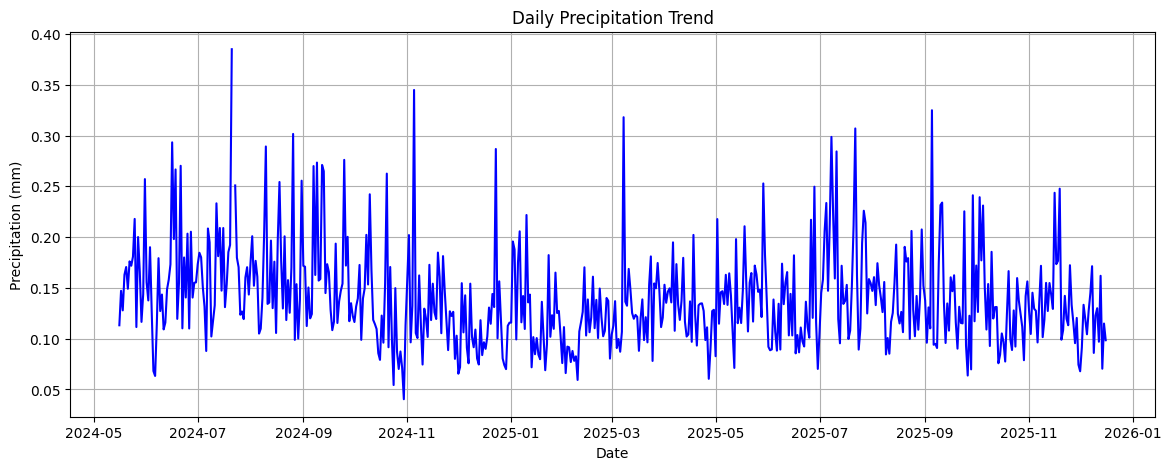

In [41]:
# Daily precipitation trend:
precip_daily = df.set_index('last_updated')['precip_mm'].resample('D').mean()

plt.figure(figsize=(14,5))
plt.plot(precip_daily, color='blue')
plt.title("Daily Precipitation Trend")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.grid()
plt.show()


# Outliers

In [42]:
Q1=df['temperature_celsius'].quantile(0.25)
Q3=df['temperature_celsius'].quantile(0.75)
IQR=Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
outliers=df[(df['temperature_celsius']<lower_limit) | (df['temperature_celsius']>upper_limit)]

In [43]:
print("Quantile 1:",Q1)
print("Quantile 3:",Q3)
print("Inter Quartile Range:",IQR)
print("Lower Limit:",lower_limit)
print("Upper Limit:",upper_limit)

Quantile 1: 17.2
Quantile 3: 28.2
Inter Quartile Range: 11.0
Lower Limit: 0.6999999999999993
Upper Limit: 44.7


In [44]:
outliers

country location_name  latitude  longitude          timezone  \
784       Australia      Canberra  -35.2800   149.2200  Australia/Sydney   
1200           Chad     N'djamena   12.1100    15.0500     Africa/Douala   
2344      Australia      Canberra  -35.2800   149.2200  Australia/Sydney   
2539      Australia      Canberra  -35.2800   149.2200  Australia/Sydney   
2816         Kuwait   Kuwait City   29.3700    47.9600       Asia/Kuwait   
...             ...           ...       ...        ...               ...   
112591       Russia        Moscow   55.7522    37.6156     Europe/Moscow   
112601       Serbia      Belgrade   44.8040    20.4651   Europe/Belgrade   
112606     Slovenia     Ljubljana   46.0553    14.5144  Europe/Ljubljana   
112617  Switzerland          Bern   46.9167     7.4667     Europe/Zurich   
112623     Bulgaria           Lom   43.8139    23.2361      Europe/Sofia   

        last_updated_epoch        last_updated  temperature_celsius  \
784             1716127200 2024-05-20 00:00:00                 -1.0   
1200            1716302700 2024-05-21 15:45:00                 45.0   
2344            1716820200 2024-05-28 00:30:00                  0.0   
2539            1716906600 2024-05-29 00:30:00                  0.0   
2816            1716991200 2024-05-29 17:00:00                 44.8   
...                    ...                 ...                  ...   
112591          1765869300 2025-12-16 10:15:00                 -2.7   
112601          1765869300 2025-12-16 08:15:00                 -0.6   
112606          1765869300 2025-12-16 08:15:00                 -2.7   
112617          1765869300 2025-12-16 08:15:00                 -0.6   
112623          1765869300 2025-12-16 09:15:00                 -0.8   

        temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
784                       30.2          Clear  ...               5.10   
1200                     113.0          Sunny  ...              24.80   
2344                      32.0          Clear  ...              21.10   
2539                      32.0          Clear  ...              19.90   
2816                     112.6          Sunny  ...              70.90   
...                        ...            ...  ...                ...   
112591                    27.1  Moderate rain  ...              47.95   
112601                    30.9   Freezing fog  ...              51.55   
112606                    27.1  Partly cloudy  ...              27.15   
112617                    30.9           Mist  ...               8.75   
112623                    30.6   Freezing fog  ...              42.75   

        air_quality_PM10  air_quality_us-epa-index air_quality_gb-defra-index  \
784                 7.30                         1                          1   
1200               87.70                         2                          3   
2344               23.80                         2                          2   
2539               23.50                         2                          2   
2816              444.30                         4                          9   
...                  ...                       ...                        ...   
112591             56.75                         3                          5   
112601             56.65                         3                          6   
112606             33.05                         2                          3   
112617             11.15                         1                          1   
112623             48.05                         3                          5   

         sunrise    sunset  moonrise   moonset       moon_phase  \
784     06:54 AM  05:05 PM  02:39 PM  02:28 AM   Waxing Gibbous   
1200    05:35 AM  06:18 PM  04:38 PM  03:48 AM   Waxing Gibbous   
2344    07:00 AM  05:01 PM  08:07 PM  10:30 AM   Waning Gibbous   
2539    07:01 AM  05:00 PM  09:18 PM  11:17 AM   Waning Gibbous   
2816    04:50 AM  06:42 PM  11:59 PM  10:08 AM   Waning Gibbo

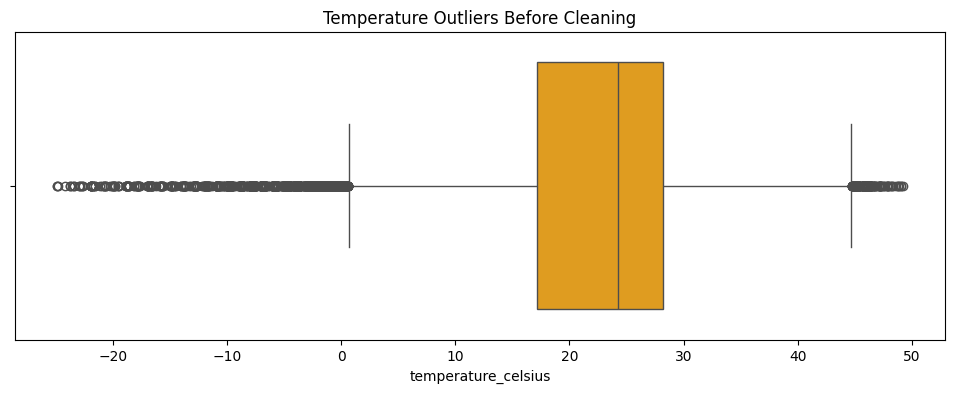

In [45]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['temperature_celsius'], color="orange")
plt.title("Temperature Outliers Before Cleaning")
plt.show()

### Distribution of temperature_celsius with Outlier Thresholds

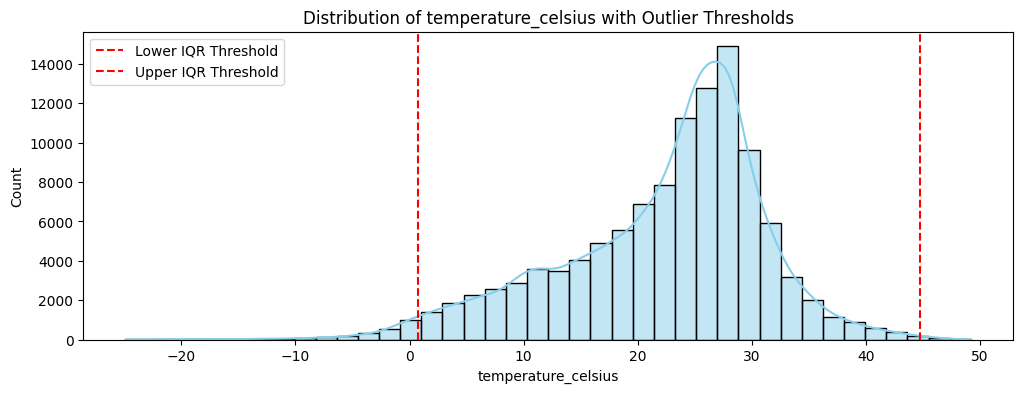

In [46]:
plt.figure(figsize=(12,4))
sns.histplot(df['temperature_celsius'], bins=40, kde=True, color="skyblue")
plt.axvline(lower_limit, color='red', linestyle='--', label='Lower IQR Threshold')
plt.axvline(upper_limit, color='red', linestyle='--', label='Upper IQR Threshold')
plt.title(f"Distribution of {'temperature_celsius'} with Outlier Thresholds")
plt.legend()
plt.show()

### Outlier Analysis(Column-wise)

In [47]:
outliers_list = []
for col in numerical_cols:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1

  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  outliers=df[(df[col]<lower_limit) | (df[col]>upper_limit)]
  count=len(outliers)
  percent=(count/len(df))*100
  outliers_list.append([col,count,percent,lower_limit,upper_limit])

outliers_df = pd.DataFrame(outliers_list, columns=['Feature', 'Outliers', 'Percent', 'Lower_Limit', 'Upper_Limit'])
outliers_df.sort_values(by='Outliers', ascending=False, inplace=True)
outliers_df.reset_index(drop=True, inplace=True)


In [48]:
outliers_df

Feature  Outliers    Percent   Lower_Limit  \
0                  visibility_km     22655  20.112213  1.000000e+01   
1               visibility_miles     22511  19.984375  6.000000e+00   
2                      precip_mm     21191  18.812532 -4.500000e-02   
3                      precip_in     17749  15.756860  0.000000e+00   
4    air_quality_Sulphur_dioxide     15350  13.627123 -1.088750e+01   
5               air_quality_PM10     11976  10.631819 -3.878250e+01   
6   air_quality_Nitrogen_dioxide     11968  10.624717 -2.321750e+01   
7     air_quality_gb-defra-index     11407  10.126683 -2.000000e+00   
8    air_quality_Carbon_Monoxide     10208   9.062259 -1.802000e+02   
9              air_quality_PM2.5      9550   8.478112 -2.469750e+01   
10                     longitude      8664   7.691557 -9.296025e+01   
11      air_quality_us-epa-index      8357   7.419014 -5.000000e-01   
12                   pressure_in      4268   3.788962  2.948500e+01   
13                   pressure_mb      3323   2.950028  9.980000e+02   
14                      gust_kph      3030   2.689914 -1.030000e+01   
15                      gust_mph      3019   2.680149 -6.500000e+00   
16             air_quality_Ozone      2864   2.542546 -1.550000e+01   
17        temperature_fahrenheit      2467   2.190105  3.330000e+01   
18           temperature_celsius      2456   2.180340  7.000000e-01   
19         feels_like_fahrenheit      2272   2.016992  2.745000e+01   
20            feels_like_celsius      2268   2.013441 -2.600000e+00   
21                      wind_kph      1769   1.570448 -1.075000e+01   
22                      wind_mph      1632   1.448825 -6.800000e+00   
23                      uv_index       256   0.227267 -8.400000e+00   
24                         cloud         0   0.000000 -1.125000e+02   
25            last_updated_epoch         0   0.000000  1.691019e+09   
26                      latitude         0   0.000000 -5.122500e+01   
27                      humidity         0   0.000000 -3.500000e+00   
28                   wind_degree         0   0.000000 -1.790000e+02   
29             moon_illumination         0   0.000000 -9.000000e+01   

     Upper_Limit  
0   1.000000e+01  
1   6.000000e+00  
2   7.500000e-02  
3   0.000000e+00  
4   2.061250e+01  
5   9.223750e+01  
6   4.264250e+01  
7   6.000000e+00  
8   8.878000e+02  
9   6.040250e+01  
10  1.367041e+02  
11  3.500000e+00  
12  3.040500e+01  
13  1.030000e+03  
14  4.490000e+01  
15  2.790000e+01  
16  1.325000e+02  
17  1.125000e+02  
18  4.470000e+01  
19  1.222500e+02  
20  5.020000e+01  
21  3.525000e+01  
22  2.200000e+01  
23  1.480000e+01  
24  1.875000e+02  
25  1.790880e+09  
26  9.537500e+01  
27  1.365000e+02  
28  5.170000e+02  
29  1.900000e+02

In [49]:
from scipy import stats

temp_zscore = np.abs(stats.zscore(df_ind['temperature_celsius']))
anomalies_temp = df_ind[np.abs(temp_zscore) > 2]


In [50]:
anomalies_temp

country location_name  latitude  longitude      timezone  \
6310     India     New Delhi      28.6       77.2  Asia/Kolkata   
6694     India     New Delhi      28.6       77.2  Asia/Kolkata   
40061    India     New Delhi      28.6       77.2  Asia/Kolkata   
42791    India     New Delhi      28.6       77.2  Asia/Kolkata   
45520    India     New Delhi      28.6       77.2  Asia/Kolkata   
45695    India     New Delhi      28.6       77.2  Asia/Kolkata   
46264    India     New Delhi      28.6       77.2  Asia/Kolkata   
46459    India     New Delhi      28.6       77.2  Asia/Kolkata   
46654    India     New Delhi      28.6       77.2  Asia/Kolkata   
46849    India     New Delhi      28.6       77.2  Asia/Kolkata   
47239    India     New Delhi      28.6       77.2  Asia/Kolkata   
47434    India     New Delhi      28.6       77.2  Asia/Kolkata   
47629    India     New Delhi      28.6       77.2  Asia/Kolkata   
75681    India     New Delhi      28.6       77.2  Asia/Kolkata   
112330   India     New Delhi      28.6       77.2  Asia/Kolkata   

        last_updated_epoch        last_updated  temperature_celsius  \
6310            1718545500 2024-06-16 19:15:00                 44.8   
6694            1718719200 2024-06-18 19:30:00                 44.1   
40061           1733741100 2024-12-09 16:15:00                 19.1   
42791           1734950700 2024-12-23 16:15:00                 14.3   
45520           1736159400 2025-01-06 16:00:00                 14.4   
45695           1736246700 2025-01-07 16:15:00                 16.1   
46264           1736506800 2025-01-10 16:30:00                 17.4   
46459           1736591400 2025-01-11 16:00:00                 14.3   
46654           1736675100 2025-01-12 15:15:00                 15.0   
46849           1736762400 2025-01-13 15:30:00                 16.3   
47239           1736937000 2025-01-15 16:00:00                 17.1   
47434           1737021600 2025-01-16 15:30:00                 18.3   
47629           1737109800 2025-01-17 16:00:00                 15.3   
75681           1749545100 2025-06-10 14:15:00                 43.2   
112330          1765783800 2025-12-15 13:00:00                 18.4   

        temperature_fahrenheit                       condition_text  ...  \
6310                     112.7                                Clear  ...   
6694                     111.5                                Clear  ...   
40061                     66.4                                 Mist  ...   
42791                     57.8                   Patchy rain nearby  ...   
45520                     57.9                                  Fog  ...   
45695                     61.0                                  Fog  ...   
46264                     63.3                             Overcast  ...   
46459                     57.7  Moderate or heavy rain with thunder  ...   
46654                     59.0                                 Mist  ...   
46849                     61.3                                 Mist  ...   
47239                     62.8                                 Mist  ...   
47434                     64.9                                 Mist  ...   
47629                     59.5                                 Mist  ...   
75681                    109.8                                 Mist  ...   
112330                    65.1                                  Fog  ...   

        air_quality_PM10  air_quality_us-epa-index  \
6310              62.300                         2   
6694              80.300                         2   
40061            114.145                         4   
42791            260.110                         6   
45520            222.185                         5   
45695            150.405                         4   
46264            257.520                         6   
46459            273.060                         6   
46654            147.815                         4   
46849            200.725                

In [51]:
from scipy import stats
import numpy as np
z_outliers = {}
outlier_rows = {}
for col in numerical_cols:
    z_scores = np.abs(stats.zscore(df_ind[col]))
    z_outliers[col] = (z_scores > 3).sum()
    outlier_rows[col] = df_ind[z_scores > 3]
print("Number of Z-score outliers in each column:")
for col, count in z_outliers.items():
    print(f"{col}: {count}")

Number of Z-score outliers in each column:
latitude: 0
longitude: 0
last_updated_epoch: 0
temperature_celsius: 0
temperature_fahrenheit: 0
wind_mph: 6
wind_kph: 6
wind_degree: 0
pressure_mb: 0
pressure_in: 0
precip_mm: 14
precip_in: 14
humidity: 0
cloud: 0
feels_like_celsius: 0
feels_like_fahrenheit: 0
visibility_km: 0
visibility_miles: 0
uv_index: 0
gust_mph: 6
gust_kph: 6
air_quality_Carbon_Monoxide: 12
air_quality_Ozone: 1
air_quality_Nitrogen_dioxide: 8
air_quality_Sulphur_dioxide: 5
air_quality_PM2.5: 4
air_quality_PM10: 15
air_quality_us-epa-index: 0
air_quality_gb-defra-index: 0
moon_illumination: 0


/tmp/ipython-input-1447658009.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(df_ind[col]))
/tmp/ipython-input-1447658009.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(df_ind[col]))


Z-score based anomaly detection identifies extreme temperature values that deviate significantly from historical patterns. These anomalies may represent heatwaves or cold spells rather than data errors.

In [52]:
cols=['temperature_celsius','humidity','precip_mm']
for col in cols:
  india_temp_ts = (
      df_ind
      .groupby('last_updated')['temperature_celsius']
      .mean()
  )
  window = 30  # 30-day window

  rolling_mean = india_temp_ts.rolling(window).mean()
  rolling_std = india_temp_ts.rolling(window).std()

  upper_band = rolling_mean + 3 * rolling_std
  lower_band = rolling_mean - 3 * rolling_std

  anomalies_ts = india_temp_ts[
      (india_temp_ts > upper_band) | (india_temp_ts < lower_band)
  ]
  print(f"Anomalies in {col}:")
  print(anomalies_ts.to_frame(name=col))
  print

Anomalies in temperature_celsius:
                     temperature_celsius
last_updated                            
2024-06-21 19:00:00                 31.1
2024-12-23 16:15:00                 14.3
2025-05-02 14:30:00                 27.3
2025-07-31 14:00:00                 26.0
2025-09-30 13:30:00                 23.1
Anomalies in humidity:
                     humidity
last_updated                 
2024-06-21 19:00:00      31.1
2024-12-23 16:15:00      14.3
2025-05-02 14:30:00      27.3
2025-07-31 14:00:00      26.0
2025-09-30 13:30:00      23.1
Anomalies in precip_mm:
                     precip_mm
last_updated                  
2024-06-21 19:00:00       31.1
2024-12-23 16:15:00       14.3
2025-05-02 14:30:00       27.3
2025-07-31 14:00:00       26.0
2025-09-30 13:30:00       23.1


In [53]:
from sklearn.ensemble import IsolationForest

features = df_ind[
    ['temperature_celsius', 'humidity', 'precip_mm', 'pressure_mb']
].dropna()

iso = IsolationForest(contamination=0.01, random_state=42)
df_ind['anomaly_iforest'] = iso.fit_predict(features)

anomalies_ml = df_ind[df_ind['anomaly_iforest'] == -1]
anomalies_ml

country location_name  latitude  longitude      timezone  \
9582    India     New Delhi      28.6       77.2  Asia/Kolkata   
20035   India     New Delhi      28.6       77.2  Asia/Kolkata   
42791   India     New Delhi      28.6       77.2  Asia/Kolkata   
46459   India     New Delhi      28.6       77.2  Asia/Kolkata   
86595   India     New Delhi      28.6       77.2  Asia/Kolkata   
88350   India     New Delhi      28.6       77.2  Asia/Kolkata   

       last_updated_epoch        last_updated  temperature_celsius  \
9582           1720011600 2024-07-03 18:30:00                 26.2   
20035          1724848200 2024-08-28 18:00:00                 30.1   
42791          1734950700 2024-12-23 16:15:00                 14.3   
46459          1736591400 2025-01-11 16:00:00                 14.3   
86595          1754382600 2025-08-05 14:00:00                 32.0   
88350          1755159300 2025-08-14 13:45:00                 26.1   

       temperature_fahrenheit                       condition_text  ...  \
9582                     79.2  Moderate or heavy rain with thunder  ...   
20035                    86.2  Moderate or heavy rain with thunder  ...   
42791                    57.8                   Patchy rain nearby  ...   
46459                    57.7  Moderate or heavy rain with thunder  ...   
86595                    89.6                                 Mist  ...   
88350                    79.0                           Light rain  ...   

       air_quality_us-epa-index  air_quality_gb-defra-index   sunrise  \
9582                          4                           9  05:28 AM   
20035                         4                          10  05:57 AM   
42791                         6                          10  07:11 AM   
46459                         6                          10  07:15 AM   
86595                         4                          10  05:45 AM   
88350                         5                          10  05:50 AM   

         sunset  moonrise   moonset       moon_phase  moon_illumination  \
9582   07:23 PM  02:39 AM  05:12 PM  Waning Crescent                 10   
20035  06:47 PM  12:13 AM  03:03 PM  Waning Crescent                 33   
42791  05:30 PM  12:13 AM  12:26 PM     Last Quarter                 52   
46459  05:43 PM  03:00 PM  04:46 AM   Waxing Gibbous                 88   
86595  07:09 PM  04:19 PM  01:29 AM   Waxing Gibbous                 79   
88350  07:01 PM  10:07 PM  10:46 AM   Waning Gibbous                 77   

       month  anomaly_iforest  
9582       7               -1  
20035      8               -1  
42791     12               -1  
46459      1               -1  
86595      8               -1  
88350      8               -1  

[6 rows x 43 columns]

/tmp/ipython-input-1506746041.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


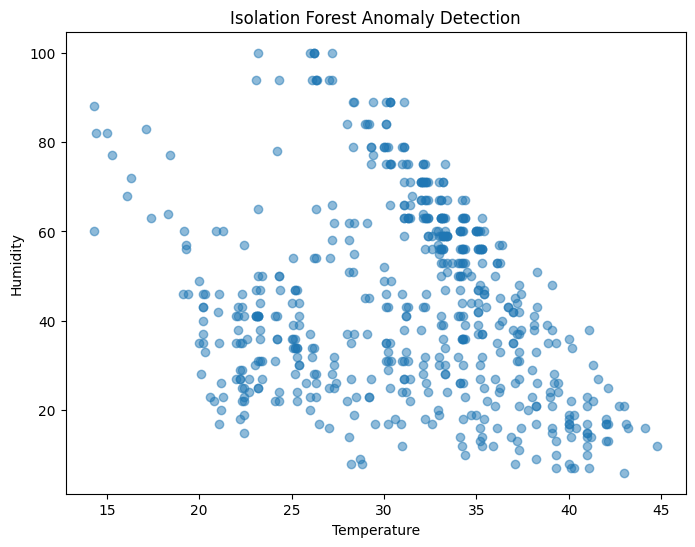

In [54]:
df_india = df[df['country'] == 'India'].copy()

plt.figure(figsize=(8,6))
plt.scatter(
    df_india['temperature_celsius'],
    df_india['humidity'],
    # c=df_india['anomaly_iforest'],
    cmap='coolwarm',
    alpha=0.5
)
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.title("Isolation Forest Anomaly Detection")
plt.show()


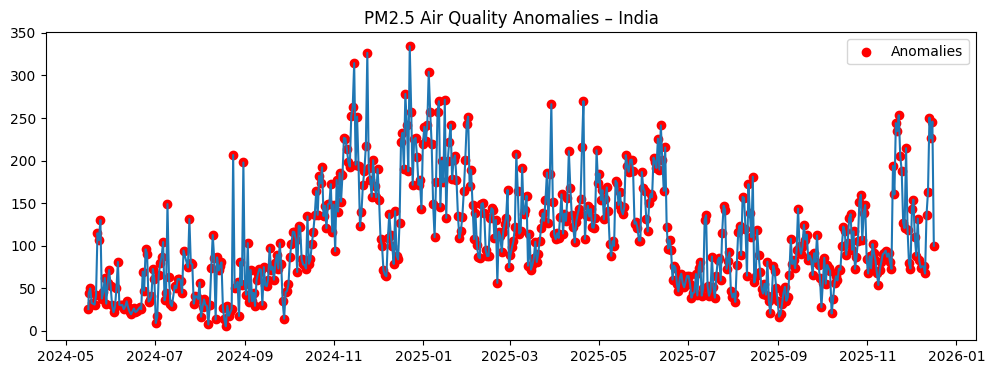

In [55]:
plt.figure(figsize=(12,4))
plt.plot(df_india['last_updated'], df_india['air_quality_PM2.5'])
plt.scatter(
    df_india['last_updated'],
    df_india['air_quality_PM2.5'],
    color='red',
    label='Anomalies'
)
plt.legend()
plt.title("PM2.5 Air Quality Anomalies – India")
plt.show()


Additionally, anomaly detection techniques are applied to identify
extreme weather events and unusual climatic behavior.


Only a small number of anomalies were detected, indicating stable
weather patterns with occasional extreme events rather than noisy data.


### Box plot to discover outliers across columns

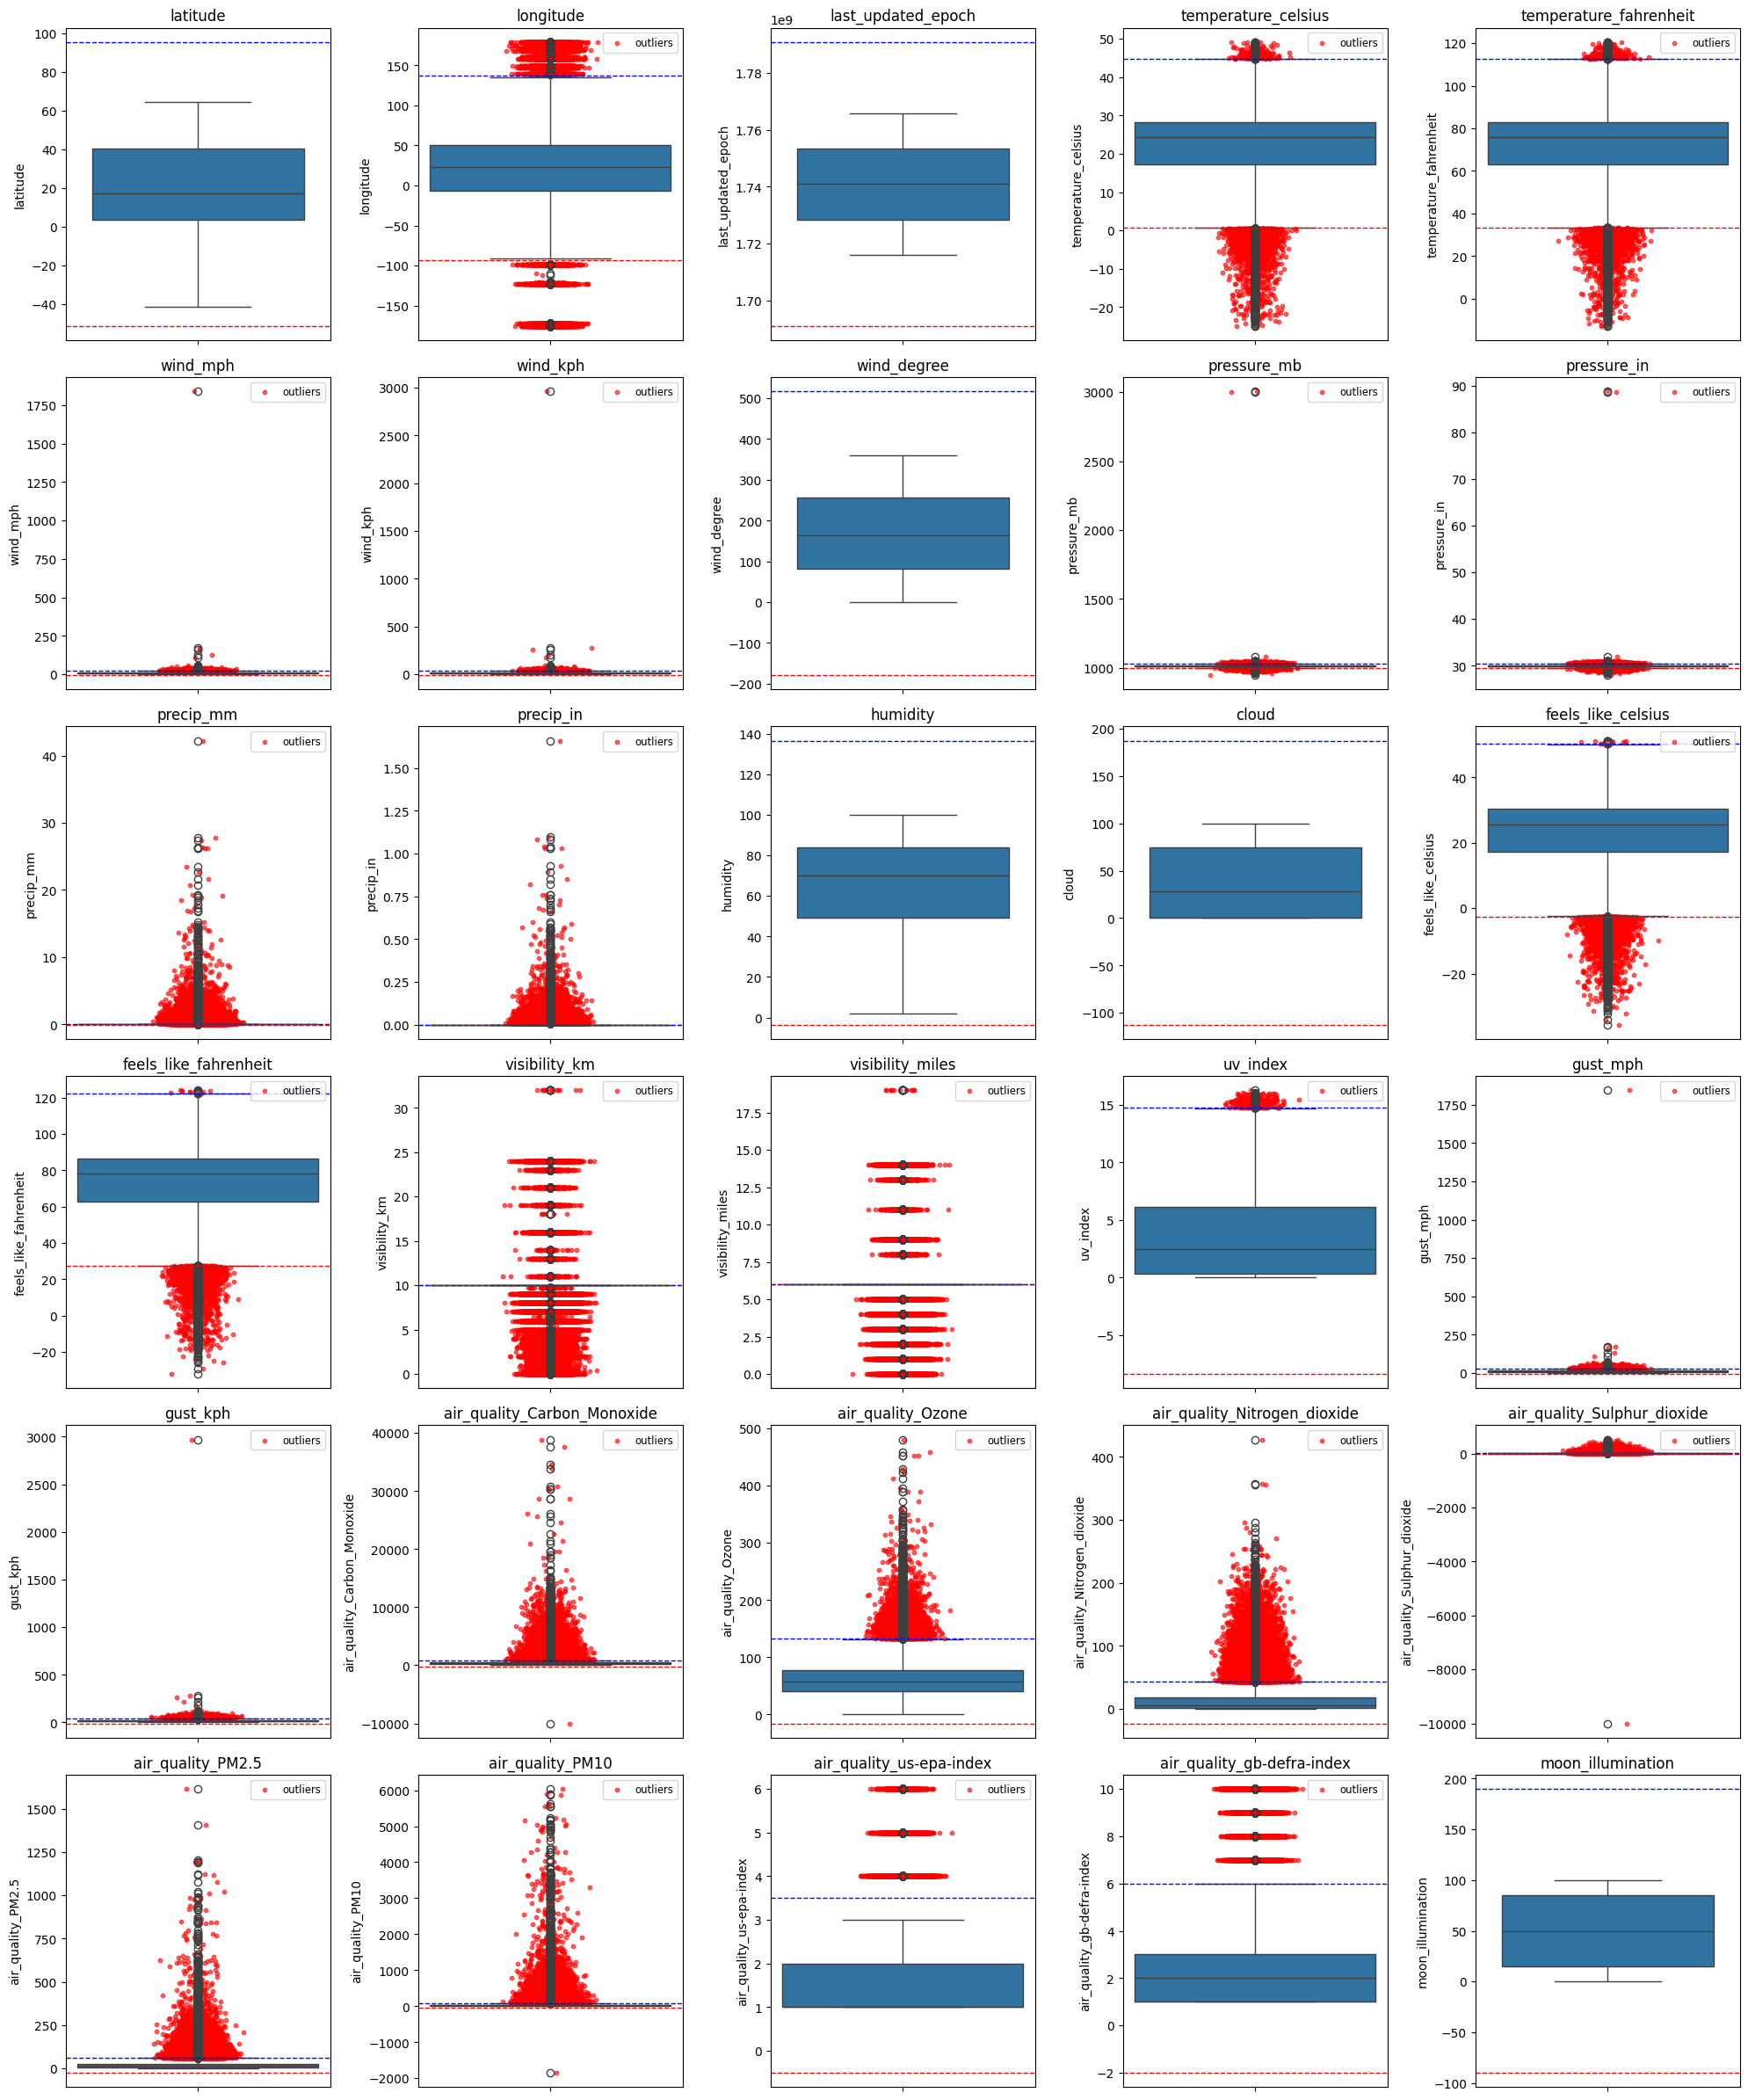

In [56]:
# grid layout
num_cols = 5
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols
plt.figure(figsize=(20, num_rows * 4))

for i, column in enumerate(numerical_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)

    # compute IQR bounds for THIS column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # draw boxplot (single-column)
    sns.boxplot(y=df[column], ax=ax)

    # draw bounds as horizontal lines
    ax.axhline(y=lower_bound, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=upper_bound, color='blue', linestyle='--', linewidth=1)

    # overlay the outlier points (if any) as red dots with horizontal jitter
    outlier_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers = df.loc[outlier_mask, column]
    if len(outliers) > 0:
        # jitter so points don't sit exactly on the center line
        x_jitter = np.random.normal(loc=0.0, scale=0.04, size=len(outliers))
        ax.scatter(x_jitter, outliers, color='red', s=10, alpha=0.6, label='outliers')
        ax.legend(loc='upper right', fontsize='small')

    ax.set_title(column)
    ax.set_xlabel('')


plt.tight_layout()
plt.show()


# Exploratory Data Analysis(EDA)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


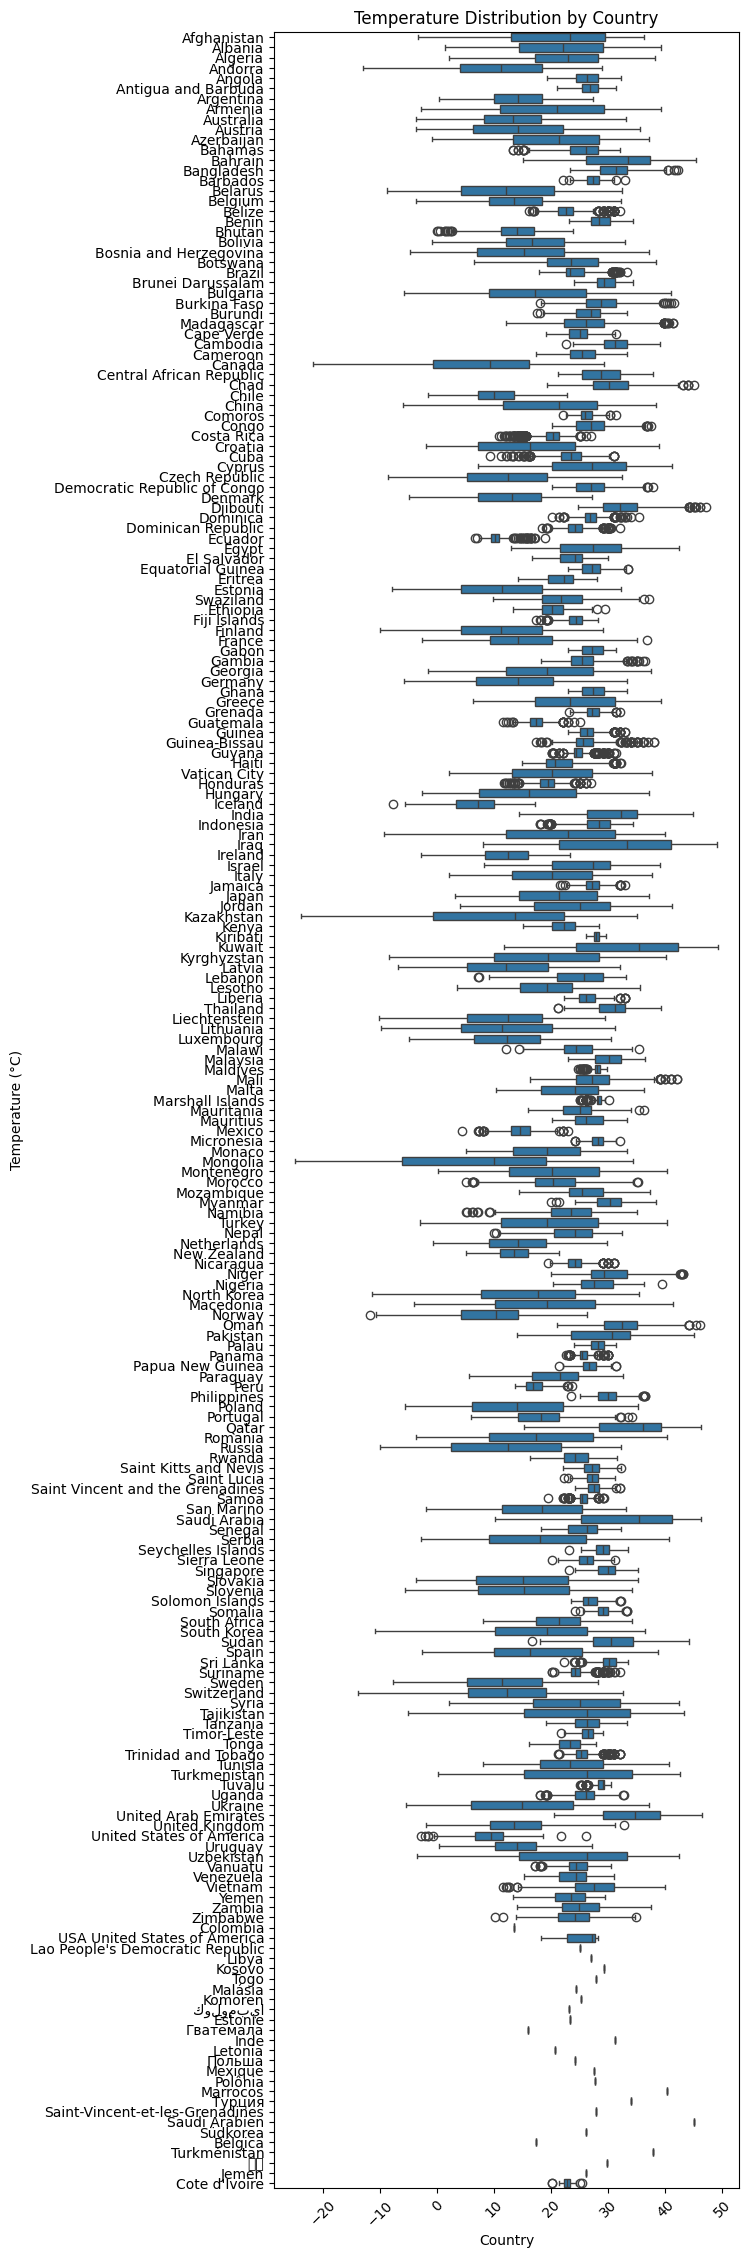

In [57]:
# This is a boxplot visualization that shows how temperature varies across different countries in the dataset.
plt.figure(figsize=(6, 28))
sns.boxplot(x='temperature_celsius', y='country', data=df)

plt.xticks(rotation=45)
plt.title('Temperature Distribution by Country')
plt.ylabel('Temperature (°C)')
plt.xlabel('Country')

plt.show()


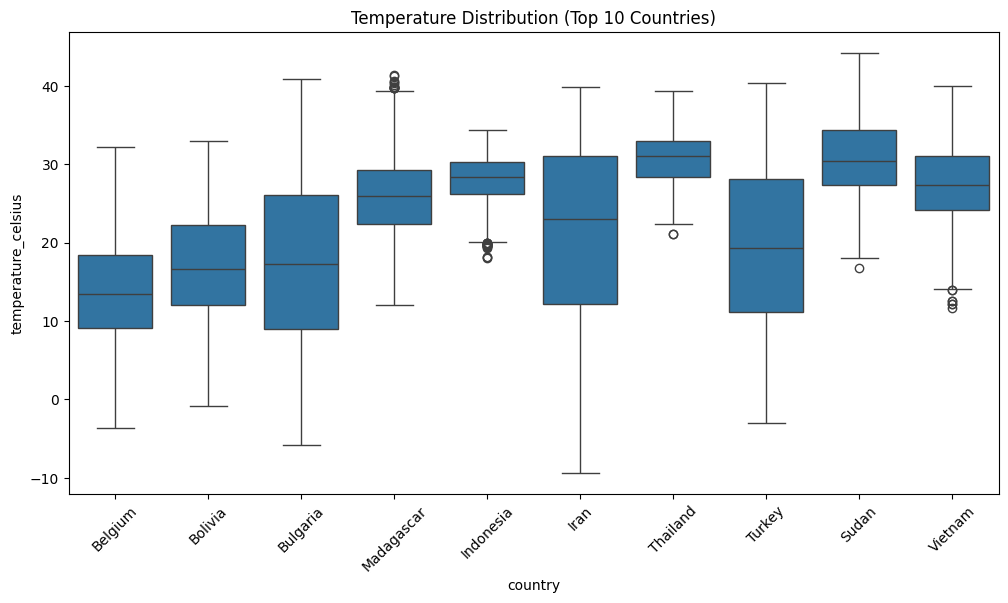

In [58]:
# Show only top 10 countries with most cities
top10 = df['country'].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.boxplot(x='country', y='temperature_celsius', data=df[df['country'].isin(top10)])
plt.xticks(rotation=45)
plt.title('Temperature Distribution (Top 10 Countries)')
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


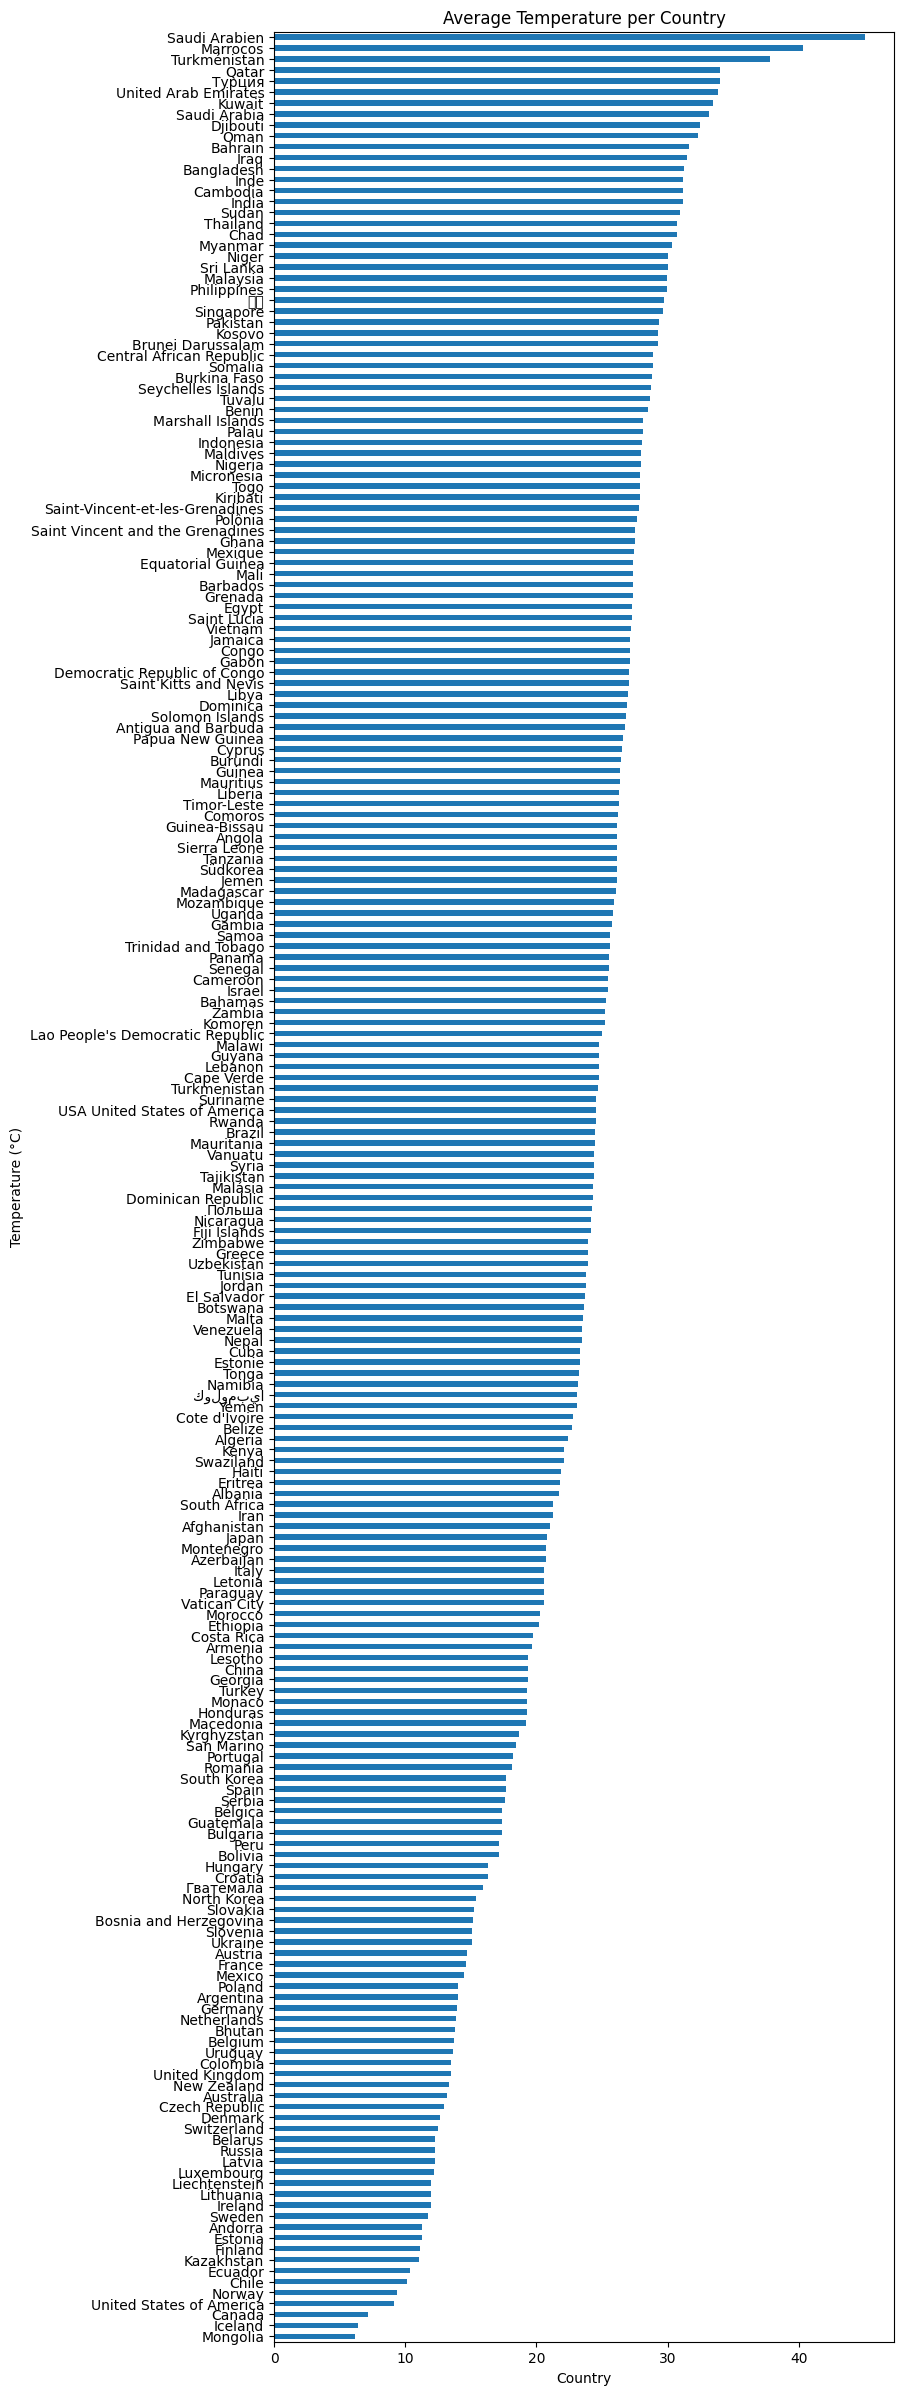

In [59]:
# Aggregate first, then plot a simpler bar chart
country_mean = df.groupby('country')['temperature_celsius'].mean().sort_values()

plt.figure(figsize=(8,30))
country_mean.plot(kind='barh')
plt.title("Average Temperature per Country")
plt.ylabel("Temperature (°C)")
plt.xlabel("Country")
plt.show()


### Data distribution over years

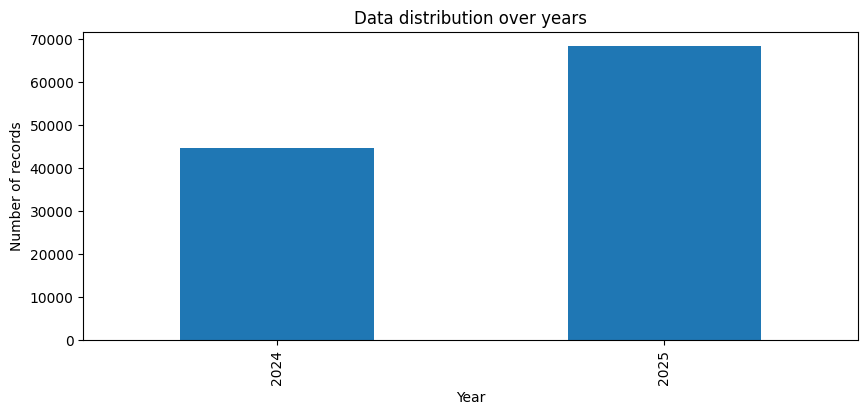

In [60]:
# df['last_updated'] = pd.to_datetime(df['last_updated'])

df['year'] = df['last_updated'].dt.year
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(10,4))
plt.title("Data distribution over years")
plt.xlabel("Year")
plt.ylabel("Number of records")
plt.show()


In [61]:
df['year'] = df['last_updated'].dt.year
df['month'] = df['last_updated'].dt.month
df_india = df[df['country'] == 'India'].copy()
df_india.shape

(577, 43)

In [62]:
selected_cols = [
     'last_updated','temperature_celsius',
    'condition_text', 'wind_direction', 'moon_phase',
    'wind_kph', 'wind_degree', 'gust_kph',
    'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'uv_index',
    'feels_like_celsius', 'visibility_km',
    'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
    'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
    'air_quality_PM2.5', 'air_quality_PM10',
    'air_quality_us-epa-index', 'air_quality_gb-defra-index','year','month'
]

df_india = df_india[selected_cols]

df_india

last_updated  temperature_celsius condition_text wind_direction  \
77     2024-05-16 14:15:00                 42.0           Mist            NNW   
272    2024-05-16 19:30:00                 38.0           Mist             NE   
467    2024-05-17 21:30:00                 36.0           Mist              N   
659    2024-05-18 20:00:00                 41.0           Mist            WNW   
853    2024-05-19 19:45:00                 41.0           Mist            WNW   
...                    ...                  ...            ...            ...   
111745 2025-12-12 13:00:00                 22.1           Mist             NW   
111940 2025-12-13 12:45:00                 24.2       Overcast            ESE   
112135 2025-12-14 12:45:00                 22.4       Overcast            WSW   
112330 2025-12-15 13:00:00                 18.4            Fog            WNW   
112525 2025-12-16 12:45:00                 22.4           Mist            WNW   

             moon_phase  wind_kph  wind_degree  gust_kph  pressure_mb  \
77       Waxing Gibbous      11.2          330      18.4       1008.0   
272      Waxing Gibbous      11.2           50      13.4       1005.0   
467      Waxing Gibbous       3.6           10       8.7       1003.0   
659      Waxing Gibbous      11.2          300      29.0       1000.0   
853      Waxing Gibbous      11.2          290      21.1        999.0   
...                 ...       ...          ...       ...          ...   
111745     Last Quarter       3.6          313      10.8       1017.0   
111940  Waning Crescent       5.0          111       5.8       1018.0   
112135  Waning Crescent       3.6          246      10.8       1019.0   
112330  Waning Crescent      10.8          297      12.4       1019.0   
112525  Waning Crescent      14.0          298      16.2       1017.0   

        precip_mm  ...  air_quality_Carbon_Monoxide  air_quality_Ozone  \
77            0.0  ...                       307.10              144.5   
272           0.0  ...                       741.00              120.2   
467           0.0  ...                       907.90               88.7   
659           0.0  ...                       454.00              128.8   
853           0.0  ...                       527.40              113.0   
...           ...  ...                          ...                ...   
111745        0.0  ...                      1848.85               28.0   
111940        0.0  ...                      3349.85               10.0   
112135        0.0  ...                      4763.85               16.0   
112330        0.0  ...                      2489.85               57.0   
112525        0.0  ...                      1327.85               83.0   

        air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
77                              3.00                         6.10   
272                            22.60                        22.90   
467                            24.70                        19.30   
659                             8.40                        10.40   
853                            12.70                        11.70   
...                              ...                          ...   
111745                         64.35                        63.95   
111940                         99.15                        86.95   
112135                         79.75                        82.55   
112330                         87.65                        83.65   
112525                         25.75                        42.95   

        air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
77                  25.40             64.00                         2   
272                 44.00             80.80                         3   
467                 49.70             83.70                         3   
659                 32.50             58.70                         2   
853                 31.70             55.00                         2   
...     

In [63]:
df_country = df_india.sort_values('last_updated')

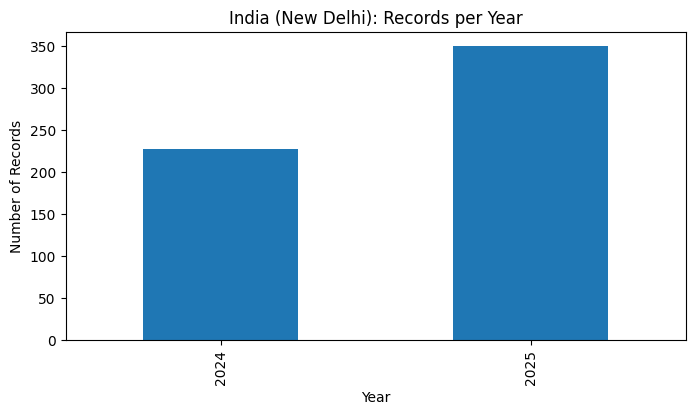

In [64]:
df_country['year'].value_counts().sort_index().plot(kind='bar', figsize=(8,4))
plt.title("India (New Delhi): Records per Year")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.show()


# Climate Analyses

## Spatial Analysis

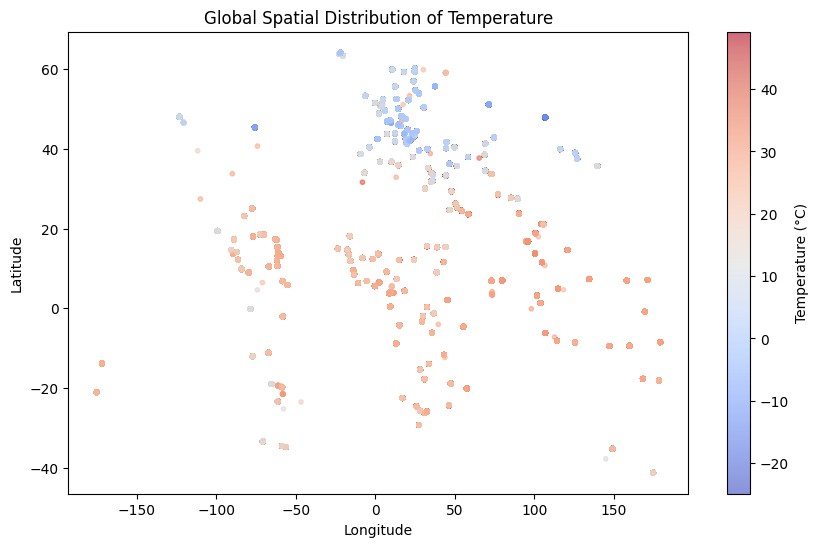

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(
    df['longitude'],
    df['latitude'],
    c=df['temperature_celsius'],
    cmap='coolwarm',
    alpha=0.6,
    s=10
)
plt.colorbar(label='Temperature (°C)')
plt.title("Global Spatial Distribution of Temperature")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


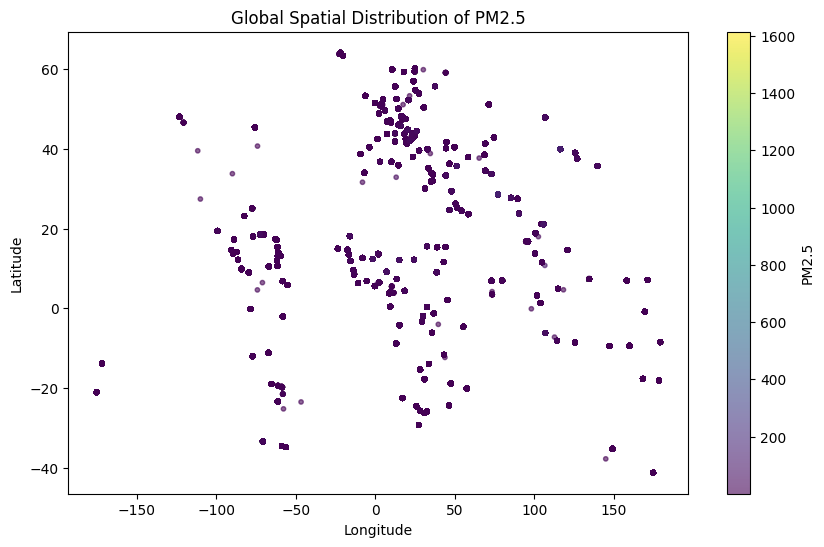

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(
    df['longitude'],
    df['latitude'],
    c=df['air_quality_PM2.5'],
    cmap='viridis',
    alpha=0.6,
    s=10
)
plt.colorbar(label='PM2.5')
plt.title("Global Spatial Distribution of PM2.5")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


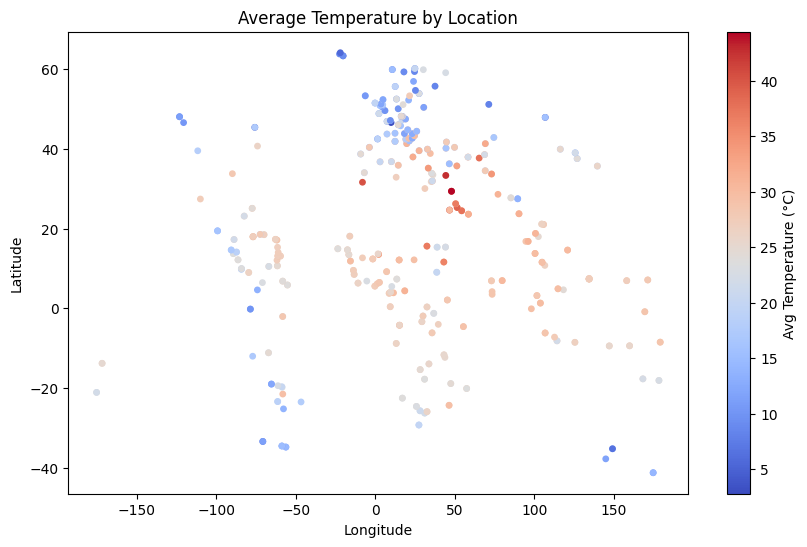

In [67]:
location_avg = (
    df.groupby(['latitude','longitude'])['temperature_celsius']
      .mean()
      .reset_index()
)

plt.figure(figsize=(10,6))
plt.scatter(
    location_avg['longitude'],
    location_avg['latitude'],
    c=location_avg['temperature_celsius'],
    cmap='coolwarm',
    s=15
)
plt.colorbar(label='Avg Temperature (°C)')
plt.title("Average Temperature by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Spatial analysis was performed using latitude and longitude coordinates
to visualize geographical weather patterns. Global temperature
distribution reveals clear latitudinal gradients, with higher
temperatures concentrated near equatorial regions and cooler conditions
towards higher latitudes.

Air quality spatial visualization highlights regional pollution clusters,
particularly over densely populated and industrialized areas. Country-
level analysis for India further reveals intra-regional variations,
demonstrating the influence of geography on local climate conditions.

These spatial patterns emphasize the strong relationship between
geography, climate zones, and environmental conditions.


## 6. Country-Specific Analysis: India

Only weather data corresponding to **India** is selected for time series modeling.
This ensures the model learns country-specific seasonal patterns.


In [68]:
df_india.columns

Index(['last_updated', 'temperature_celsius', 'condition_text',
       'wind_direction', 'moon_phase', 'wind_kph', 'wind_degree', 'gust_kph',
       'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'uv_index',
       'feels_like_celsius', 'visibility_km', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'year',
       'month'],
      dtype='object')

## Temperature trend over time

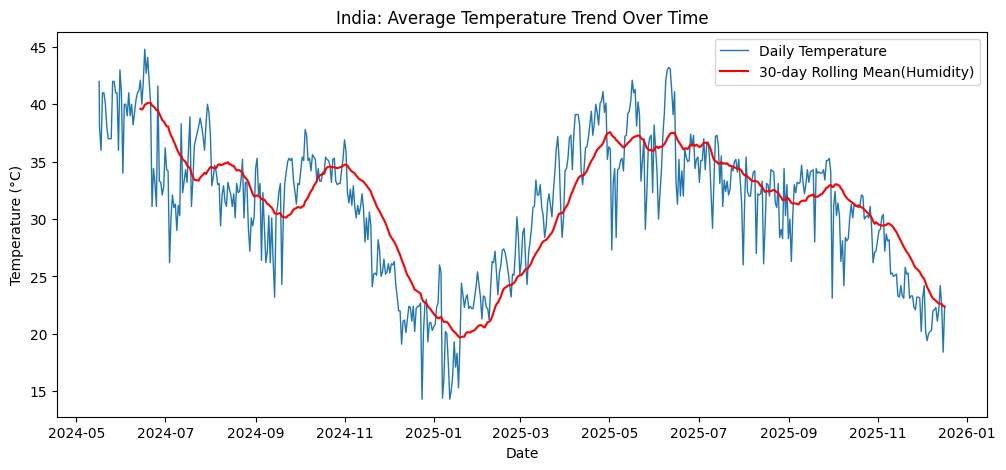

In [69]:
india_temp_ts = (
    df_india
    .groupby('last_updated')['temperature_celsius']
    .mean()
)
rolling_temp = india_temp_ts.rolling(window=30).mean()

plt.figure(figsize=(12,5))
plt.plot(india_temp_ts, linewidth=1, label="Daily Temperature")
plt.plot(rolling_temp, color='red', label="30-day Rolling Mean(Humidity)")
plt.legend()
plt.title("India: Average Temperature Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


## Monthly average temperature (Seasonality)

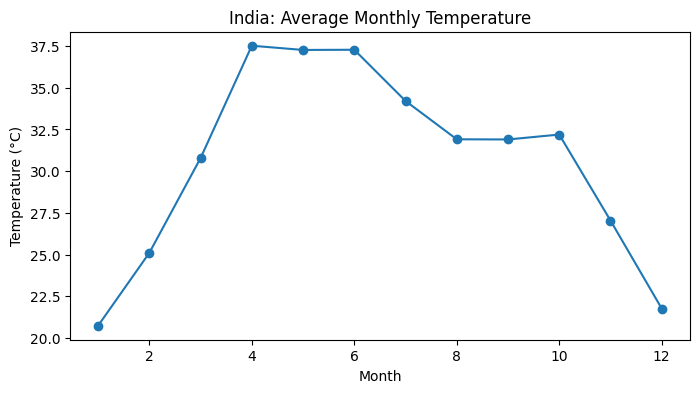

In [70]:
monthly_temp_india = (
    df_india
    .groupby('month')['temperature_celsius']
    .mean()
)

plt.figure(figsize=(8,4))
monthly_temp_india.plot(marker='o')
plt.title("India: Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()


## Temperature distribution

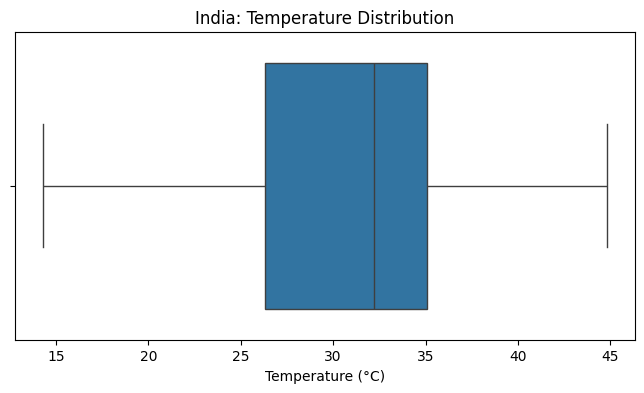

In [71]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_india['temperature_celsius'])
plt.title("India: Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.show()


## Precipitation trend over time

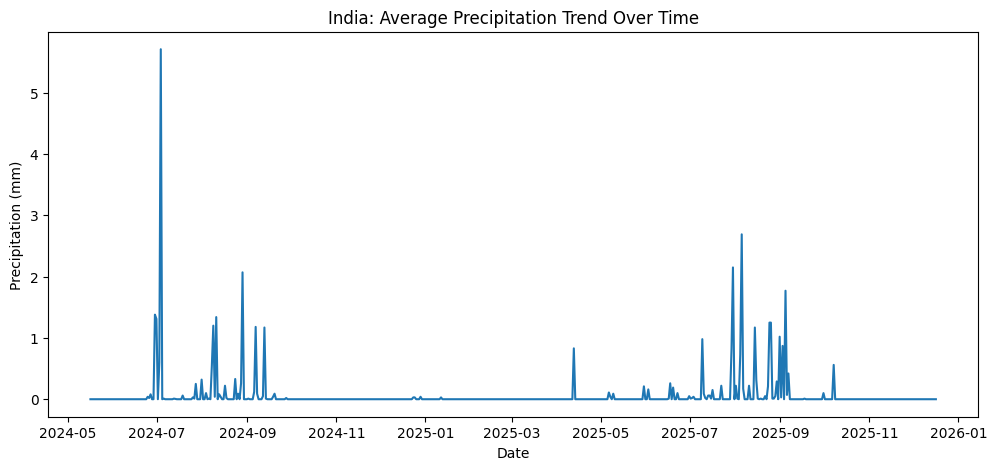

In [72]:
india_precip_ts = (
    df_india
    .groupby('last_updated')['precip_mm']
    .mean()
)

plt.figure(figsize=(12,5))
plt.plot(india_precip_ts)
plt.title("India: Average Precipitation Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.show()


## Monthly precipitation (Monsoon pattern)

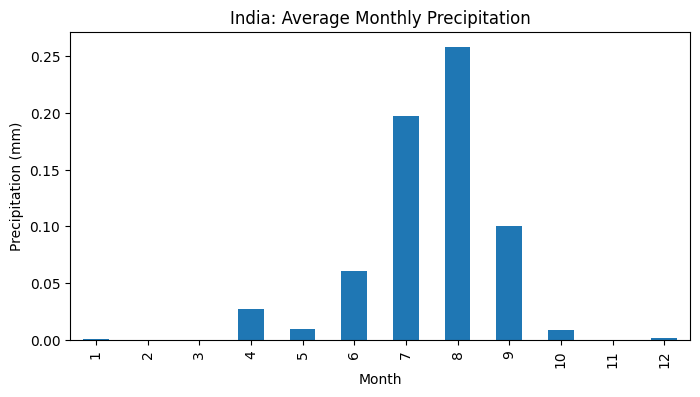

In [73]:
monthly_precip_india = (
    df_india
    .groupby('month')['precip_mm']
    .mean()
)

plt.figure(figsize=(8,4))
monthly_precip_india.plot(kind='bar')
plt.title("India: Average Monthly Precipitation")
plt.xlabel("Month")
plt.ylabel("Precipitation (mm)")
plt.show()


## Precipitation distribution

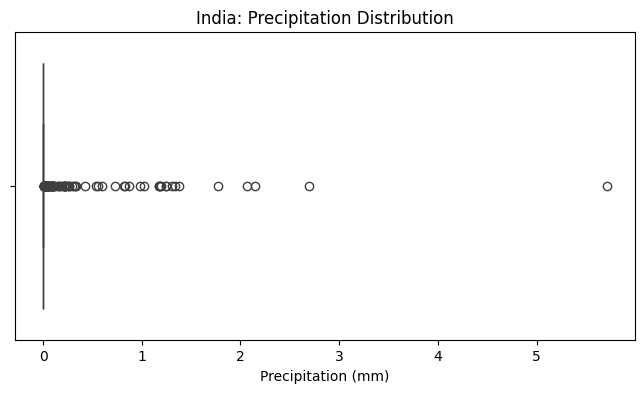

In [74]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_india['precip_mm'])
plt.title("India: Precipitation Distribution")
plt.xlabel("Precipitation (mm)")
plt.show()


## Correlation Analysis

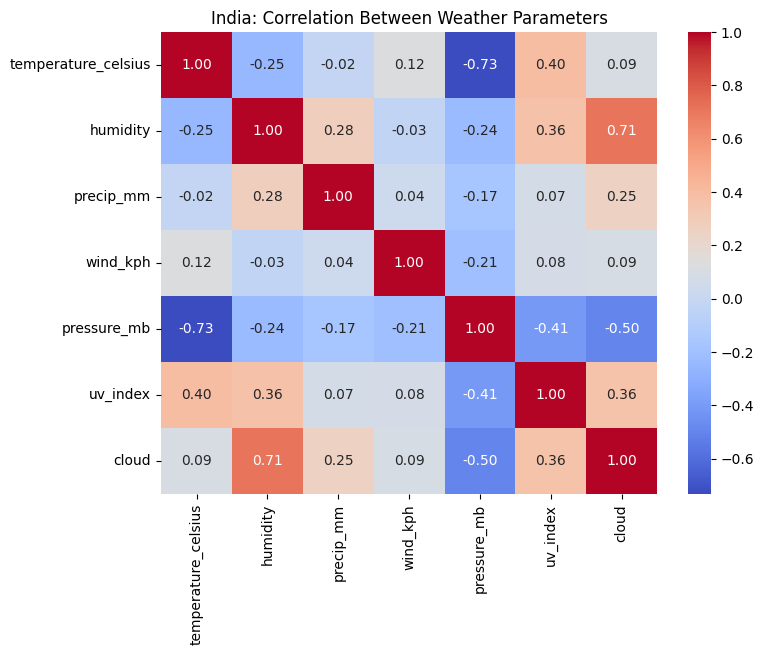

In [75]:
num_cols = [
    'temperature_celsius',
    'humidity',
    'precip_mm',
    'wind_kph',
    'pressure_mb',
    'uv_index',
    'cloud'
]

plt.figure(figsize=(8,6))
sns.heatmap(
    df_india[num_cols].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("India: Correlation Between Weather Parameters")
plt.show()


The exploratory data analysis reveals strong seasonal patterns in India’s temperature and precipitation, particularly evident in monthly trends. Clear correlations exist between humidity, precipitation, and atmospheric pressure. These findings justify the use of time-series forecasting models using the last_updated feature for India-specific weather prediction.

In [76]:
ts_temp_daily = (
    df_india.set_index('last_updated',inplace=False)['humidity']
    .resample('D')
    .mean()
    .interpolate(method='time')
)

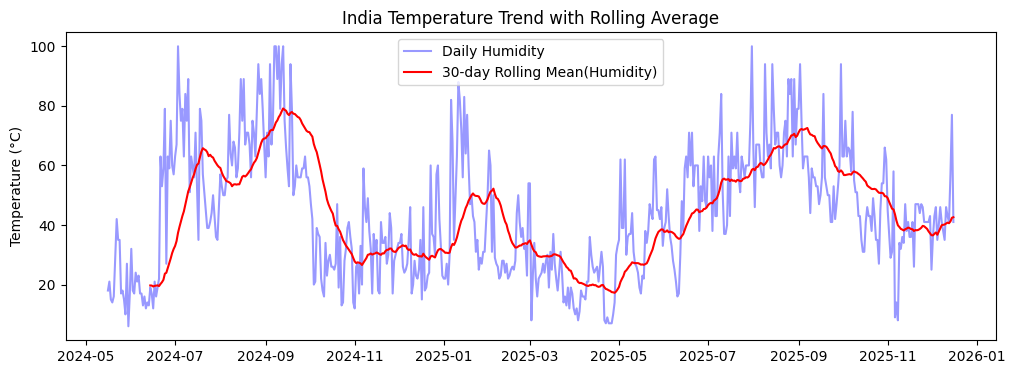

In [77]:
rolling_temp = ts_temp_daily.rolling(window=30).mean()

plt.figure(figsize=(12,4))
plt.plot(ts_temp_daily, color='blue', alpha=0.4, label="Daily Humidity")
plt.plot(rolling_temp, color='red', label="30-day Rolling Mean(Humidity)")
plt.legend()
plt.title("India Temperature Trend with Rolling Average")
plt.ylabel("Temperature (°C)")
plt.show()


In [78]:
df_india

last_updated  temperature_celsius condition_text wind_direction  \
77     2024-05-16 14:15:00                 42.0           Mist            NNW   
272    2024-05-16 19:30:00                 38.0           Mist             NE   
467    2024-05-17 21:30:00                 36.0           Mist              N   
659    2024-05-18 20:00:00                 41.0           Mist            WNW   
853    2024-05-19 19:45:00                 41.0           Mist            WNW   
...                    ...                  ...            ...            ...   
111745 2025-12-12 13:00:00                 22.1           Mist             NW   
111940 2025-12-13 12:45:00                 24.2       Overcast            ESE   
112135 2025-12-14 12:45:00                 22.4       Overcast            WSW   
112330 2025-12-15 13:00:00                 18.4            Fog            WNW   
112525 2025-12-16 12:45:00                 22.4           Mist            WNW   

             moon_phase  wind_kph  wind_degree  gust_kph  pressure_mb  \
77       Waxing Gibbous      11.2          330      18.4       1008.0   
272      Waxing Gibbous      11.2           50      13.4       1005.0   
467      Waxing Gibbous       3.6           10       8.7       1003.0   
659      Waxing Gibbous      11.2          300      29.0       1000.0   
853      Waxing Gibbous      11.2          290      21.1        999.0   
...                 ...       ...          ...       ...          ...   
111745     Last Quarter       3.6          313      10.8       1017.0   
111940  Waning Crescent       5.0          111       5.8       1018.0   
112135  Waning Crescent       3.6          246      10.8       1019.0   
112330  Waning Crescent      10.8          297      12.4       1019.0   
112525  Waning Crescent      14.0          298      16.2       1017.0   

        precip_mm  ...  air_quality_Carbon_Monoxide  air_quality_Ozone  \
77            0.0  ...                       307.10              144.5   
272           0.0  ...                       741.00              120.2   
467           0.0  ...                       907.90               88.7   
659           0.0  ...                       454.00              128.8   
853           0.0  ...                       527.40              113.0   
...           ...  ...                          ...                ...   
111745        0.0  ...                      1848.85               28.0   
111940        0.0  ...                      3349.85               10.0   
112135        0.0  ...                      4763.85               16.0   
112330        0.0  ...                      2489.85               57.0   
112525        0.0  ...                      1327.85               83.0   

        air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
77                              3.00                         6.10   
272                            22.60                        22.90   
467                            24.70                        19.30   
659                             8.40                        10.40   
853                            12.70                        11.70   
...                              ...                          ...   
111745                         64.35                        63.95   
111940                         99.15                        86.95   
112135                         79.75                        82.55   
112330                         87.65                        83.65   
112525                         25.75                        42.95   

        air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
77                  25.40             64.00                         2   
272                 44.00             80.80                         3   
467                 49.70             83.70                         3   
659                 32.50             58.70                         2   
853                 31.70             55.00                         2   
...     

## Feature Importance

In [79]:
features = [
    'humidity',
    'precip_mm',
    'pressure_mb',
    'wind_kph',
    'uv_index',
    'cloud'
]

X = df_ind[features].dropna()
y = df_ind.loc[X.index, 'temperature_celsius']


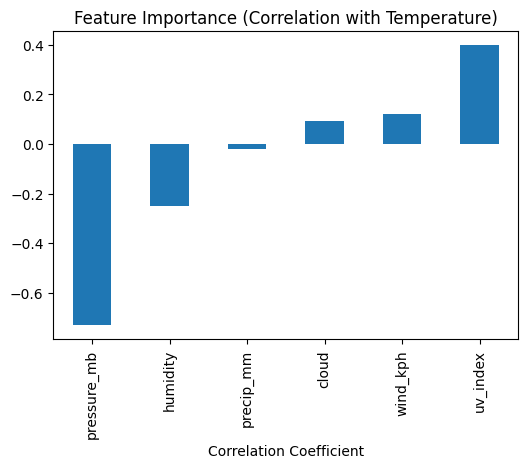

In [110]:
corr_with_temp = X.join(y).corr()['temperature_celsius'].drop('temperature_celsius')

corr_with_temp.sort_values().plot(kind='bar', figsize=(6,4))
plt.title("Feature Importance (Correlation with Temperature)")
plt.xlabel("Correlation Coefficient")
plt.show()


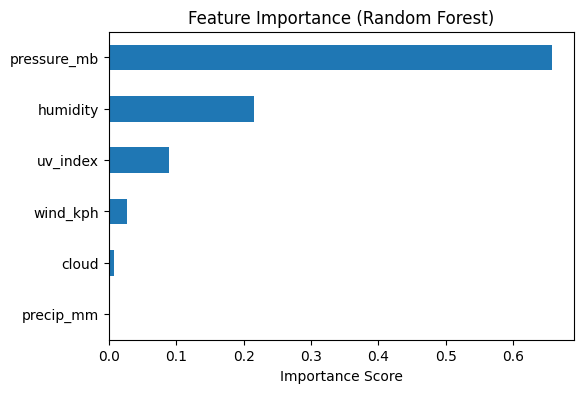

In [81]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf.fit(X, y)

rf_importance = pd.Series(
    rf.feature_importances_,
    index=features
).sort_values()

rf_importance.plot(kind='barh', figsize=(6,4))
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()


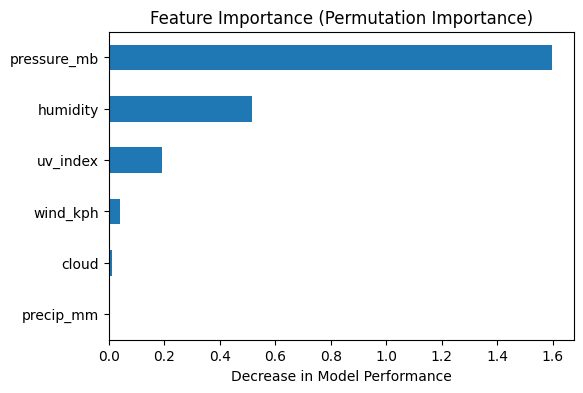

In [82]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    rf, X, y,
    n_repeats=10,
    random_state=42
)

perm_importance = pd.Series(
    perm.importances_mean,
    index=features
).sort_values()

perm_importance.plot(kind='barh', figsize=(6,4))
plt.title("Feature Importance (Permutation Importance)")
plt.xlabel("Decrease in Model Performance")
plt.show()


## Geographical Patterns
Weather conditions differ across countries and continents.

In [83]:
country_temp = (
    df.groupby('country')['temperature_celsius']
      .mean()
      .sort_values(ascending=False)
)


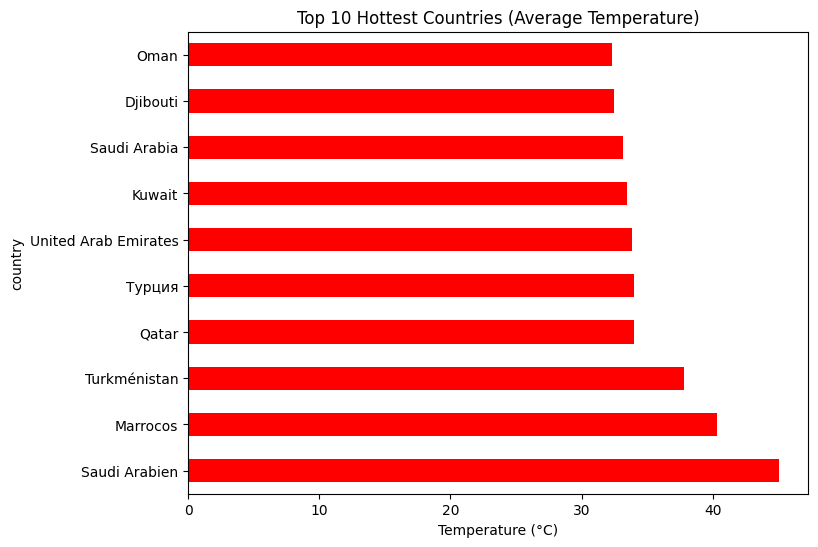

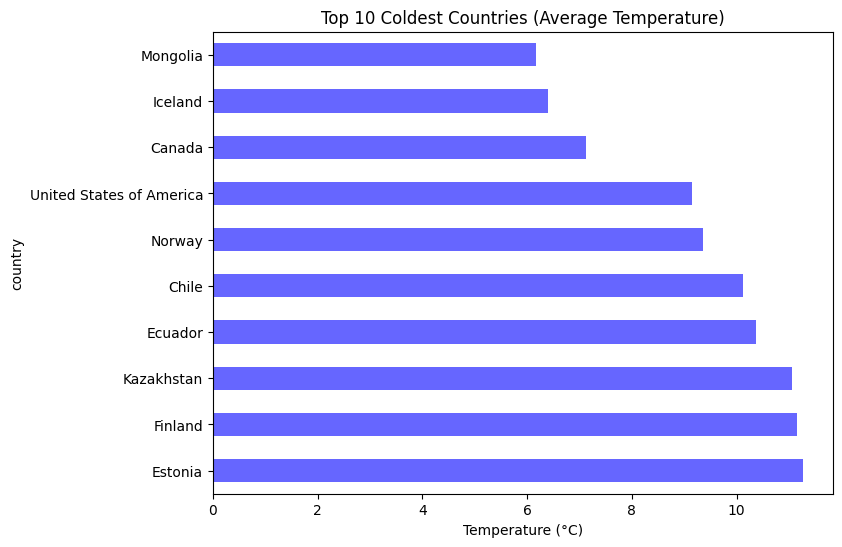

In [84]:
plt.figure(figsize=(8,6))
country_temp.head(10).plot(kind='barh', color='red')
plt.title("Top 10 Hottest Countries (Average Temperature)")
plt.xlabel("Temperature (°C)")
plt.show()

plt.figure(figsize=(8,6))
country_temp.tail(10).plot(kind='barh',alpha=0.6, color='blue')
plt.title("Top 10 Coldest Countries (Average Temperature)")
plt.xlabel("Temperature (°C)")
plt.show()


In [85]:
country_variability = (
    df.groupby('country')['temperature_celsius']
      .std()
      .sort_values(ascending=False)
)


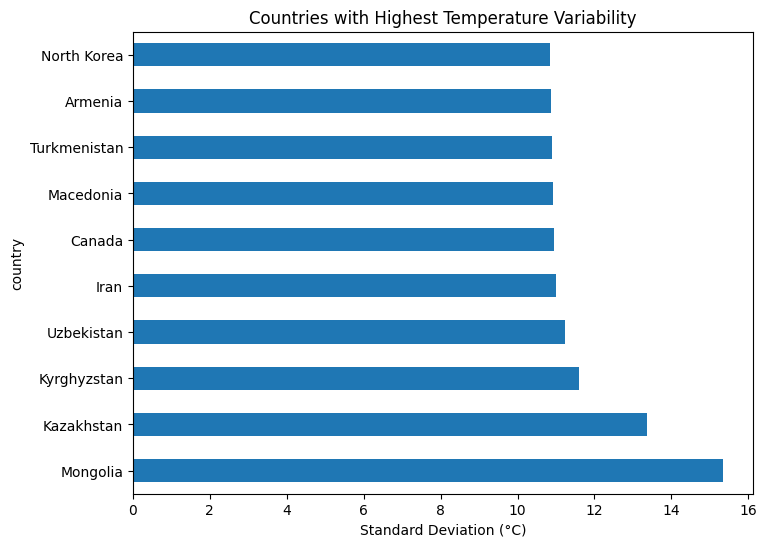

In [86]:
plt.figure(figsize=(8,6))
country_variability.head(10).plot(kind='barh')
plt.title("Countries with Highest Temperature Variability")
plt.xlabel("Standard Deviation (°C)")
plt.show()


## Climate Analysis: Long-Term Trends and Regional Variations

To study long-term climate patterns, weather data was aggregated at yearly
and monthly levels to reduce short-term variability. Global temperature
trends indicate gradual changes over time, reflecting climate-level
behavior rather than daily weather fluctuations.

Country-level analysis reveals distinct regional patterns. Tropical
regions such as India and Brazil exhibit consistently higher average
temperatures, while temperate regions such as the United Kingdom show
lower averages and reduced seasonal amplitude. Climate variability
analysis further highlights differences in temperature stability across
regions.

Monthly aggregation for India demonstrates clear seasonal climate
behavior, with warmer summer months and cooler winter periods, confirming
the presence of strong climatic seasonality.


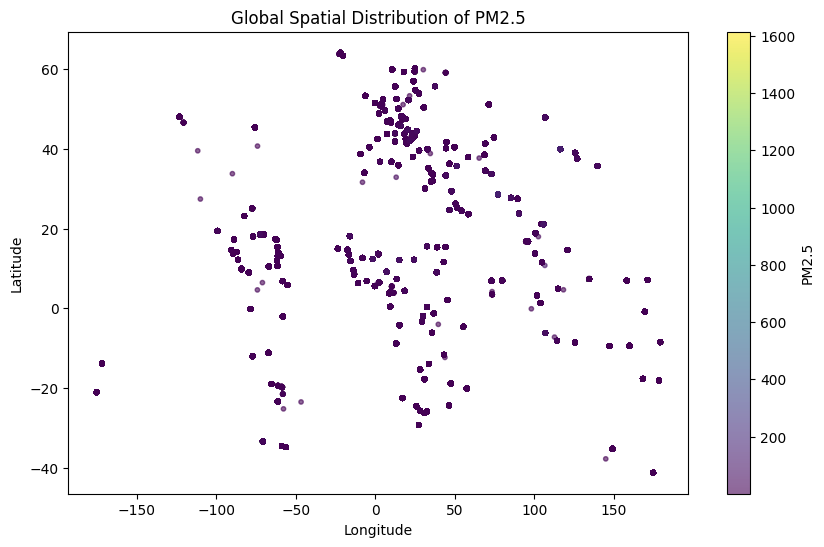

In [87]:
plt.figure(figsize=(10,6))
plt.scatter(
    df['longitude'],
    df['latitude'],
    c=df['air_quality_PM2.5'],
    cmap='viridis',
    alpha=0.6,
    s=10
)
plt.colorbar(label='PM2.5')
plt.title("Global Spatial Distribution of PM2.5")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## 7. Time Series Preparation

- `last_updated` is converted to datetime format
- Data is sorted chronologically
- Target variable: Temperature (Celsius)


In [88]:
ts=df_india.drop(columns=['year','month'])
ts.set_index('last_updated', inplace=True)

In [89]:
ts

temperature_celsius condition_text wind_direction  \
last_updated                                                             
2024-05-16 14:15:00                 42.0           Mist            NNW   
2024-05-16 19:30:00                 38.0           Mist             NE   
2024-05-17 21:30:00                 36.0           Mist              N   
2024-05-18 20:00:00                 41.0           Mist            WNW   
2024-05-19 19:45:00                 41.0           Mist            WNW   
...                                  ...            ...            ...   
2025-12-12 13:00:00                 22.1           Mist             NW   
2025-12-13 12:45:00                 24.2       Overcast            ESE   
2025-12-14 12:45:00                 22.4       Overcast            WSW   
2025-12-15 13:00:00                 18.4            Fog            WNW   
2025-12-16 12:45:00                 22.4           Mist            WNW   

                          moon_phase  wind_kph  wind_degree  gust_kph  \
last_updated                                                            
2024-05-16 14:15:00   Waxing Gibbous      11.2          330      18.4   
2024-05-16 19:30:00   Waxing Gibbous      11.2           50      13.4   
2024-05-17 21:30:00   Waxing Gibbous       3.6           10       8.7   
2024-05-18 20:00:00   Waxing Gibbous      11.2          300      29.0   
2024-05-19 19:45:00   Waxing Gibbous      11.2          290      21.1   
...                              ...       ...          ...       ...   
2025-12-12 13:00:00     Last Quarter       3.6          313      10.8   
2025-12-13 12:45:00  Waning Crescent       5.0          111       5.8   
2025-12-14 12:45:00  Waning Crescent       3.6          246      10.8   
2025-12-15 13:00:00  Waning Crescent      10.8          297      12.4   
2025-12-16 12:45:00  Waning Crescent      14.0          298      16.2   

                     pressure_mb  precip_mm  humidity  ...  \
last_updated                                           ...   
2024-05-16 14:15:00       1008.0        0.0        13  ...   
2024-05-16 19:30:00       1005.0        0.0        23  ...   
2024-05-17 21:30:00       1003.0        0.0        21  ...   
2024-05-18 20:00:00       1000.0        0.0        15  ...   
2024-05-19 19:45:00        999.0        0.0        14  ...   
...                          ...        ...       ...  ...   
2025-12-12 13:00:00       1017.0        0.0        43  ...   
2025-12-13 12:45:00       1018.0        0.0        41  ...   
2025-12-14 12:45:00       1019.0        0.0        57  ...   
2025-12-15 13:00:00       1019.0        0.0        77  ...   
2025-12-16 12:45:00       1017.0        0.0        41  ...   

                     feels_like_celsius  visibility_km  \
last_updated                                             
2024-05-16 14:15:00                43.0            4.0   
2024-05-16 19:30:00                37.1            3.5   
2024-05-17 21:30:00                34.4            3.5   
2024-05-18 20:00:00                41.4            4.0   
2024-05-19 19:45:00                41.4            4.0   
...                                 ...            ...   
2025-12-12 13:00:00                22.1            1.6   
2025-12-13 12:45:00                23.3            1.0   
2025-12-14 12:45:00                22.4            0.7   
2025-12-15 13:00:00                18.4            0.6   
2025-12-16 12:45:00                22.3            1.7   

                     air_quality_Carbon_Monoxide  air_quality_Ozone  \
last_updated                                                          
2024-05-16 14:15:00                       307.10              144.5   
2024-05-16 19:30:00                       741.00              120.2   
2024-05-17 21:30:00                       907.90               88.7   
2024-05-18 20:00:00                       454.00              128.8   
2024-05-19 19:45:00                       527.40              113.0   
...                                          ... 

In [90]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

categorical_cols = ['condition_text', 'wind_direction', 'moon_phase']
encoder = LabelEncoder()
for col in categorical_cols:
    ts[col] = encoder.fit_transform(df_country[col])

ts.head()

temperature_celsius  condition_text  wind_direction  \
last_updated                                                               
2024-05-16 14:15:00                 42.0               6               6   
2024-05-16 19:30:00                 38.0               6               4   
2024-05-17 21:30:00                 36.0               6               3   
2024-05-18 20:00:00                 41.0               6              14   
2024-05-19 19:45:00                 41.0               6              14   

                     moon_phase  wind_kph  wind_degree  gust_kph  pressure_mb  \
last_updated                                                                    
2024-05-16 14:15:00           7      11.2          330      18.4       1008.0   
2024-05-16 19:30:00           7      11.2           50      13.4       1005.0   
2024-05-17 21:30:00           7       3.6           10       8.7       1003.0   
2024-05-18 20:00:00           7      11.2          300      29.0       1000.0   
2024-05-19 19:45:00           7      11.2          290      21.1        999.0   

                     precip_mm  humidity  ...  feels_like_celsius  \
last_updated                              ...                       
2024-05-16 14:15:00        0.0        13  ...                43.0   
2024-05-16 19:30:00        0.0        23  ...                37.1   
2024-05-17 21:30:00        0.0        21  ...                34.4   
2024-05-18 20:00:00        0.0        15  ...                41.4   
2024-05-19 19:45:00        0.0        14  ...                41.4   

                     visibility_km  air_quality_Carbon_Monoxide  \
last_updated                                                      
2024-05-16 14:15:00            4.0                        307.1   
2024-05-16 19:30:00            3.5                        741.0   
2024-05-17 21:30:00            3.5                        907.9   
2024-05-18 20:00:00            4.0                        454.0   
2024-05-19 19:45:00            4.0                        527.4   

                     air_quality_Ozone  air_quality_Nitrogen_dioxide  \
last_updated                                                           
2024-05-16 14:15:00              144.5                           3.0   
2024-05-16 19:30:00              120.2                          22.6   
2024-05-17 21:30:00               88.7                          24.7   
2024-05-18 20:00:00              128.8                           8.4   
2024-05-19 19:45:00              113.0                          12.7   

                     air_quality_Sulphur_dioxide  air_quality_PM2.5  \
last_updated                                                          
2024-05-16 14:15:00                          6.1               25.4   
2024-05-16 19:30:00                         22.9               44.0   
2024-05-17 21:30:00                         19.3               49.7   
2024-05-18 20:00:00                         10.4               32.5   
2024-05-19 19:45:00                         11.7               31.7   

                     air_quality_PM10  air_quality_us-epa-index  \
last_updated                                                      
2024-05-16 14:15:00              64.0                         2   
2024-05-16 19:30:00              80.8                         3   
2024-05-17 21:30:00              83.7                         3   
2024-05-18 20:00:00              58.7                         2   
2024-05-19 19:45:00              55.0                         2   

                     air_quality_gb-defra-index  
last_updated                                     
2024-05-16 14:15:00                           3  
2024-05-16 19:30:00                           5  
2024-05-17 21:30:00                           6  
2024-05-18 20:00:00                           3  
2024-05-19 19:45:00                           3  

[5 rows x 22 columns]

In [91]:
numerical_cols = ts.select_dtypes(include=['number']).columns.difference(['temperature_celsius','last_updated'])
scaler = MinMaxScaler()
ts[numerical_cols] = scaler.fit_transform(ts[numerical_cols])
ts.head()

temperature_celsius  condition_text  wind_direction  \
last_updated                                                               
2024-05-16 14:15:00                 42.0        0.428571        0.400000   
2024-05-16 19:30:00                 38.0        0.428571        0.266667   
2024-05-17 21:30:00                 36.0        0.428571        0.200000   
2024-05-18 20:00:00                 41.0        0.428571        0.933333   
2024-05-19 19:45:00                 41.0        0.428571        0.933333   

                     moon_phase  wind_kph  wind_degree  gust_kph  pressure_mb  \
last_updated                                                                    
2024-05-16 14:15:00         1.0  0.239748     0.918768  0.398374     0.575758   
2024-05-16 19:30:00         1.0  0.239748     0.134454  0.262873     0.484848   
2024-05-17 21:30:00         1.0  0.000000     0.022409  0.135501     0.424242   
2024-05-18 20:00:00         1.0  0.239748     0.834734  0.685637     0.333333   
2024-05-19 19:45:00         1.0  0.239748     0.806723  0.471545     0.303030   

                     precip_mm  humidity  ...  feels_like_celsius  \
last_updated                              ...                       
2024-05-16 14:15:00        0.0  0.074468  ...            0.830028   
2024-05-16 19:30:00        0.0  0.180851  ...            0.662890   
2024-05-17 21:30:00        0.0  0.159574  ...            0.586402   
2024-05-18 20:00:00        0.0  0.095745  ...            0.784703   
2024-05-19 19:45:00        0.0  0.085106  ...            0.784703   

                     visibility_km  air_quality_Carbon_Monoxide  \
last_updated                                                      
2024-05-16 14:15:00       0.361702                     0.000000   
2024-05-16 19:30:00       0.308511                     0.075829   
2024-05-17 21:30:00       0.308511                     0.104997   
2024-05-18 20:00:00       0.361702                     0.025673   
2024-05-19 19:45:00       0.361702                     0.038500   

                     air_quality_Ozone  air_quality_Nitrogen_dioxide  \
last_updated                                                           
2024-05-16 14:15:00           0.498276                      0.000000   
2024-05-16 19:30:00           0.414483                      0.102484   
2024-05-17 21:30:00           0.305862                      0.113464   
2024-05-18 20:00:00           0.444138                      0.028235   
2024-05-19 19:45:00           0.389655                      0.050719   

                     air_quality_Sulphur_dioxide  air_quality_PM2.5  \
last_updated                                                          
2024-05-16 14:15:00                     0.003753           0.061380   
2024-05-16 19:30:00                     0.108825           0.117899   
2024-05-17 21:30:00                     0.086309           0.135219   
2024-05-18 20:00:00                     0.030646           0.082955   
2024-05-19 19:45:00                     0.038777           0.080524   

                     air_quality_PM10  air_quality_us-epa-index  \
last_updated                                                      
2024-05-16 14:15:00          0.035169                       0.2   
2024-05-16 19:30:00          0.045682                       0.4   
2024-05-17 21:30:00          0.047497                       0.4   
2024-05-18 20:00:00          0.031852                       0.2   
2024-05-19 19:45:00          0.029537                       0.2   

                     air_quality_gb-defra-index  
last_updated                                     
2024-05-16 14:15:00                    0.222222  
2024-05-16 19:30:00                    0.444444  
2024-05-17 21:30:00                    0.555556  
2024-05-18 20:00:00                    0.222222  
2024-05-19 19:45:00                    0.222222  

[5 rows x 22 columns]

In [112]:
adf=ts.copy()
adf

temperature_celsius  condition_text  wind_direction  \
last_updated                                                               
2024-05-16 14:15:00                 42.0        0.428571        0.400000   
2024-05-16 19:30:00                 38.0        0.428571        0.266667   
2024-05-17 21:30:00                 36.0        0.428571        0.200000   
2024-05-18 20:00:00                 41.0        0.428571        0.933333   
2024-05-19 19:45:00                 41.0        0.428571        0.933333   
...                                  ...             ...             ...   
2025-12-12 13:00:00                 22.1        0.428571        0.466667   
2025-12-13 12:45:00                 24.2        0.571429        0.133333   
2025-12-14 12:45:00                 22.4        0.571429        1.000000   
2025-12-15 13:00:00                 18.4        0.142857        0.933333   
2025-12-16 12:45:00                 22.4        0.428571        0.933333   

                     moon_phase  wind_kph  wind_degree  gust_kph  pressure_mb  \
last_updated                                                                    
2024-05-16 14:15:00    1.000000  0.239748     0.918768  0.398374     0.575758   
2024-05-16 19:30:00    1.000000  0.239748     0.134454  0.262873     0.484848   
2024-05-17 21:30:00    1.000000  0.000000     0.022409  0.135501     0.424242   
2024-05-18 20:00:00    1.000000  0.239748     0.834734  0.685637     0.333333   
2024-05-19 19:45:00    1.000000  0.239748     0.806723  0.471545     0.303030   
...                         ...       ...          ...       ...          ...   
2025-12-12 13:00:00    0.285714  0.000000     0.871148  0.192412     0.848485   
2025-12-13 12:45:00    0.571429  0.044164     0.305322  0.056911     0.878788   
2025-12-14 12:45:00    0.571429  0.000000     0.683473  0.192412     0.909091   
2025-12-15 13:00:00    0.571429  0.227129     0.826331  0.235772     0.909091   
2025-12-16 12:45:00    0.571429  0.328076     0.829132  0.338753     0.848485   

                     precip_mm  humidity  ...  feels_like_celsius  \
last_updated                              ...                       
2024-05-16 14:15:00        0.0  0.074468  ...            0.830028   
2024-05-16 19:30:00        0.0  0.180851  ...            0.662890   
2024-05-17 21:30:00        0.0  0.159574  ...            0.586402   
2024-05-18 20:00:00        0.0  0.095745  ...            0.784703   
2024-05-19 19:45:00        0.0  0.085106  ...            0.784703   
...                        ...       ...  ...                 ...   
2025-12-12 13:00:00        0.0  0.393617  ...            0.237960   
2025-12-13 12:45:00        0.0  0.372340  ...            0.271955   
2025-12-14 12:45:00        0.0  0.542553  ...            0.246459   
2025-12-15 13:00:00        0.0  0.755319  ...            0.133144   
2025-12-16 12:45:00        0.0  0.372340  ...            0.243626   

                     visibility_km  air_quality_Carbon_Monoxide  \
last_updated                                                      
2024-05-16 14:15:00       0.361702                     0.000000   
2024-05-16 19:30:00       0.308511                     0.075829   
2024-05-17 21:30:00       0.308511                     0.104997   
2024-05-18 20:00:00       0.361702                     0.025673   
2024-05-19 19:45:00       0.361702                     0.038500   
...                            ...                          ...   
2025-12-12 13:00:00       0.106383                     0.269440   
2025-12-13 12:45:00       0.042553                     0.531759   
2025-12-14 12:45:00       0.010638                     0.778873   
2025-12-15 13:00:00       0.000000                     0.381463   
2025-12-16 12:45:00       0.117021                     0.178389   

                     air_quality_Ozone  air_quality_Nitrogen_dioxide  \
last_updated                                                           
2024-05-16 14:15:00           0.498276                      0.00

## Augmented Dickey-Fuller (ADF)

In [113]:
from statsmodels.tsa.stattools import adfuller


adf_test = adfuller(adf['temperature_celsius'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"P-value: {adf_test[1]}")

adf['temp_diff'] = adf['temperature_celsius'].diff()
adf['temp_diff'].fillna(adf['temp_diff'].mean(), inplace=True)

ADF Statistic: -2.4929807346671873
P-value: 0.11719154248131364


/tmp/ipython-input-2930390892.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adf['temp_diff'].fillna(adf['temp_diff'].mean(), inplace=True)


## Autocorrelation Function(ACF) and Partial Autocorrelation Function (PACF)

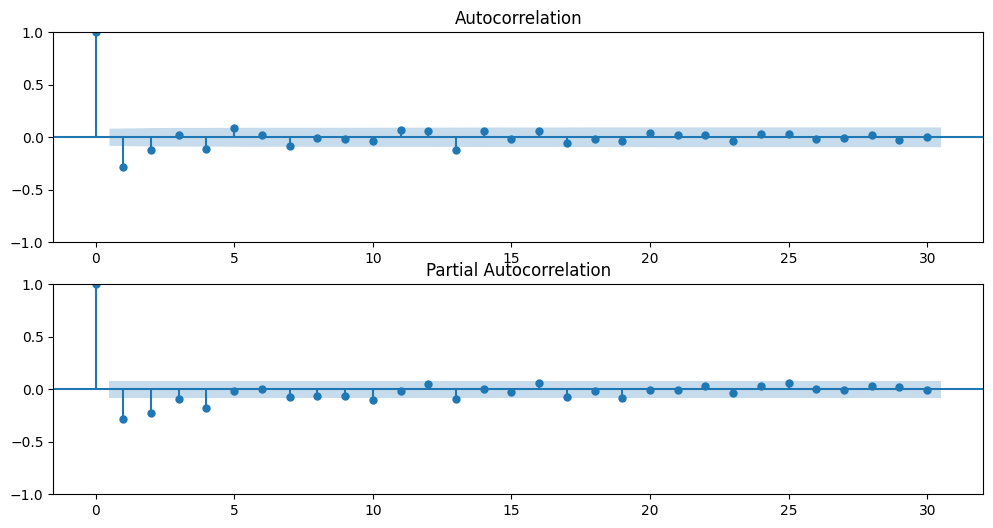

In [114]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(adf['temperature_celsius'].diff().dropna(), lags=30, ax=plt.gca())
plt.subplot(212)
plot_pacf(adf['temperature_celsius'].diff().dropna(), lags=30, ax=plt.gca())
plt.show()

## 8. Train-Test Split

The dataset is split into:
- Training set: Historical data
- Test set: Recent unseen data for evaluation


In [92]:
train_size = int(len(ts) * 0.8)
train = ts.iloc[:train_size]
test = ts.iloc[train_size:]

In [93]:
train.head()

temperature_celsius  condition_text  wind_direction  \
last_updated                                                               
2024-05-16 14:15:00                 42.0        0.428571        0.400000   
2024-05-16 19:30:00                 38.0        0.428571        0.266667   
2024-05-17 21:30:00                 36.0        0.428571        0.200000   
2024-05-18 20:00:00                 41.0        0.428571        0.933333   
2024-05-19 19:45:00                 41.0        0.428571        0.933333   

                     moon_phase  wind_kph  wind_degree  gust_kph  pressure_mb  \
last_updated                                                                    
2024-05-16 14:15:00         1.0  0.239748     0.918768  0.398374     0.575758   
2024-05-16 19:30:00         1.0  0.239748     0.134454  0.262873     0.484848   
2024-05-17 21:30:00         1.0  0.000000     0.022409  0.135501     0.424242   
2024-05-18 20:00:00         1.0  0.239748     0.834734  0.685637     0.333333   
2024-05-19 19:45:00         1.0  0.239748     0.806723  0.471545     0.303030   

                     precip_mm  humidity  ...  feels_like_celsius  \
last_updated                              ...                       
2024-05-16 14:15:00        0.0  0.074468  ...            0.830028   
2024-05-16 19:30:00        0.0  0.180851  ...            0.662890   
2024-05-17 21:30:00        0.0  0.159574  ...            0.586402   
2024-05-18 20:00:00        0.0  0.095745  ...            0.784703   
2024-05-19 19:45:00        0.0  0.085106  ...            0.784703   

                     visibility_km  air_quality_Carbon_Monoxide  \
last_updated                                                      
2024-05-16 14:15:00       0.361702                     0.000000   
2024-05-16 19:30:00       0.308511                     0.075829   
2024-05-17 21:30:00       0.308511                     0.104997   
2024-05-18 20:00:00       0.361702                     0.025673   
2024-05-19 19:45:00       0.361702                     0.038500   

                     air_quality_Ozone  air_quality_Nitrogen_dioxide  \
last_updated                                                           
2024-05-16 14:15:00           0.498276                      0.000000   
2024-05-16 19:30:00           0.414483                      0.102484   
2024-05-17 21:30:00           0.305862                      0.113464   
2024-05-18 20:00:00           0.444138                      0.028235   
2024-05-19 19:45:00           0.389655                      0.050719   

                     air_quality_Sulphur_dioxide  air_quality_PM2.5  \
last_updated                                                          
2024-05-16 14:15:00                     0.003753           0.061380   
2024-05-16 19:30:00                     0.108825           0.117899   
2024-05-17 21:30:00                     0.086309           0.135219   
2024-05-18 20:00:00                     0.030646           0.082955   
2024-05-19 19:45:00                     0.038777           0.080524   

                     air_quality_PM10  air_quality_us-epa-index  \
last_updated                                                      
2024-05-16 14:15:00          0.035169                       0.2   
2024-05-16 19:30:00          0.045682                       0.4   
2024-05-17 21:30:00          0.047497                       0.4   
2024-05-18 20:00:00          0.031852                       0.2   
2024-05-19 19:45:00          0.029537                       0.2   

                     air_quality_gb-defra-index  
last_updated                                     
2024-05-16 14:15:00                    0.222222  
2024-05-16 19:30:00                    0.444444  
2024-05-17 21:30:00                    0.555556  
2024-05-18 20:00:00                    0.222222  
2024-05-19 19:45:00                    0.222222  

[5 rows x 22 columns]

# 9. Model Building – SARIMAX

SARIMAX is chosen because:
- It handles seasonality
- It supports exogenous variables (if needed)
- Suitable for non-normalized time-series data


In [94]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
y_train = train['temperature_celsius']
X_train = train.drop(columns=['temperature_celsius'])
model = SARIMAX(
    endog=y_train,
    exog=X_train,
    order=(1,1,1),              # ARIMA part
    seasonal_order=(1,1,1,12),  # yearly seasonality (monthly cycle)
    enforce_stationarity=False,
    enforce_invertibility=False
)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [95]:
model_fit=model.fit(disp=False)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [96]:
y_test = test['temperature_celsius']
X_test = test.drop(columns=['temperature_celsius'])

sarimax_pred = model_fit.forecast(
    steps=len(test),
    exog=X_test
)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## 11. Model Evaluation

The model is evaluated using:
- MAE
- RMSE

Lower error values indicate better forecasting performance.


In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, sarimax_pred)
rmse = np.sqrt(mean_squared_error(y_test, sarimax_pred))

print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")


MAE  : 1.710
RMSE : 2.237


## 10. Forecasting Results

The model forecasts future temperature trends and compares them with actual values.


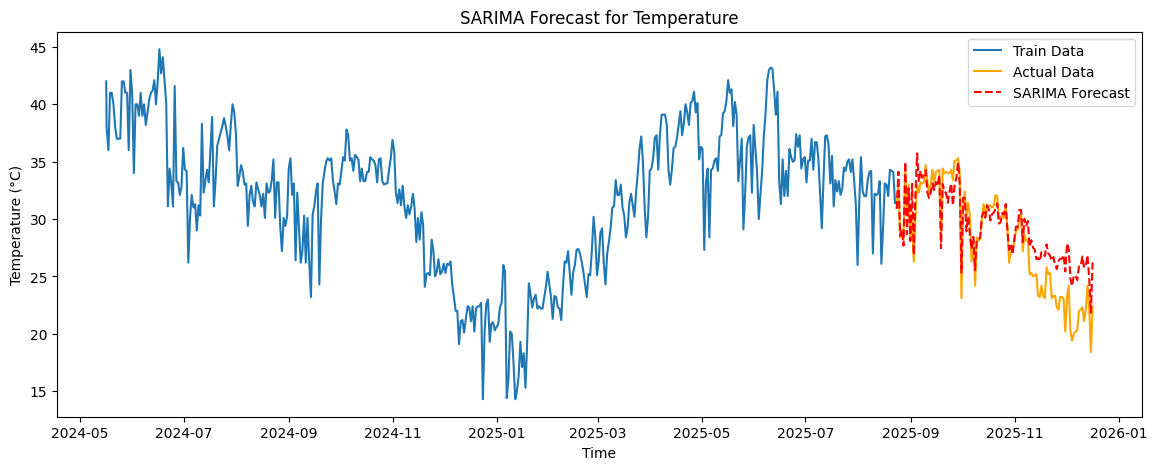

In [98]:
plt.figure(figsize=(14, 5))
plt.plot(X_train.index, train['temperature_celsius'], label="Train Data")
plt.plot(y_test.index, test['temperature_celsius'], label="Actual Data", color="orange")
plt.plot(y_test.index, sarimax_pred, label="SARIMA Forecast", color="red", linestyle="dashed")
plt.legend()
plt.title("SARIMA Forecast for Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.show()

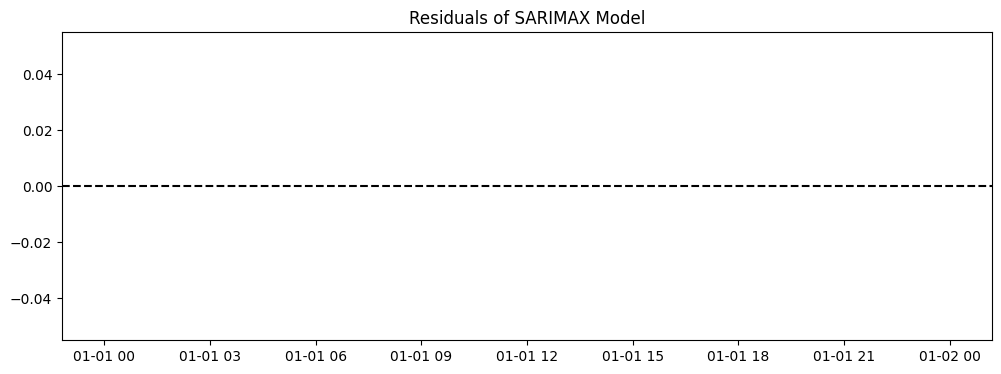

In [99]:
residuals = y_test - sarimax_pred

plt.figure(figsize=(12,4))
plt.plot(residuals)
plt.title("Residuals of SARIMAX Model")
plt.axhline(0, color='black', linestyle='--')
plt.show()


## Advanced Modeling – Facebook Prophet

Prophet is an additive time-series model designed to handle:
- Non-linear trends
- Multiple seasonalities
- Missing values and outliers

In this project, Prophet is used as an advanced benchmark model because it automatically
models trend and seasonality and performs well on real-world
business time series.


### Prophet Data Format

Prophet requires the dataset to be in a specific format:
- `ds`: datetime column
- `y`: target variable (temperature in Celsius)


In [100]:
from prophet import Prophet

data = df_india

data = data.reset_index()
data = data.rename(columns={'last_updated': 'ds', 'temperature_celsius': 'y'})
data['ds'] = pd.to_datetime(data['ds'])

prophet_df = data[['ds', 'y']]

model = Prophet()
model.fit(prophet_df)

future = model.make_future_dataframe(periods=30, freq='D')

forecast = model.predict(future)

forecast.to_csv("weather_forecast.csv", index=False)
print("Forecasting complete! Results saved to weather_forecast.csv")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Forecasting complete! Results saved to weather_forecast.csv


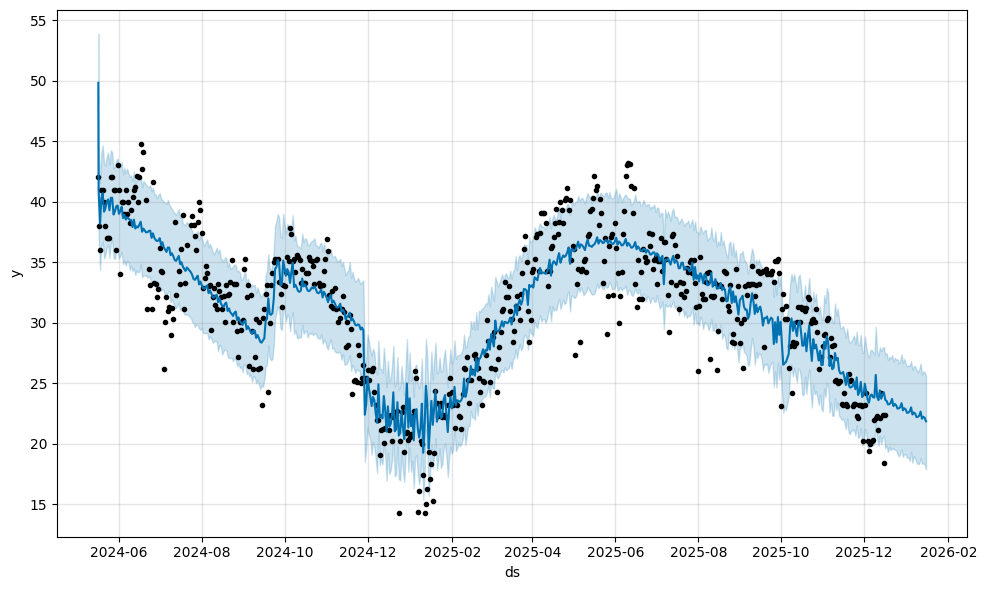

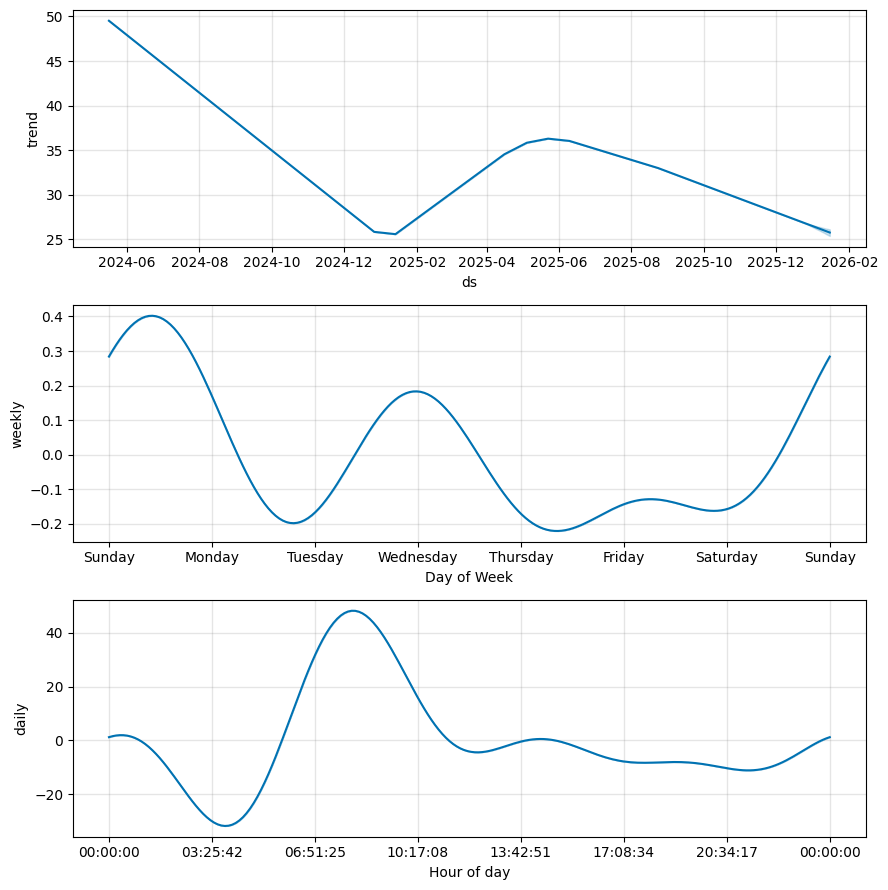

In [101]:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)
plt.show()

### Prophet Forecast Interpretation

- The black dots represent historical temperature values
- The blue line shows Prophet’s predicted trend
- The shaded region indicates uncertainty intervals


Prophet captures smoother long-term trends compared to SARIMAX,
while SARIMAX reacts more strongly to short-term fluctuations.


In [102]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

evaluation_df = data.merge(forecast[['ds', 'yhat']], on='ds', how='left').dropna()

mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])
mse = np.sqrt(mean_squared_error(evaluation_df['y'], evaluation_df['yhat']))

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (RMSE): {mse:.3f}")

Mean Absolute Error (MAE): 2.345
Mean Squared Error (RMSE): 2.955


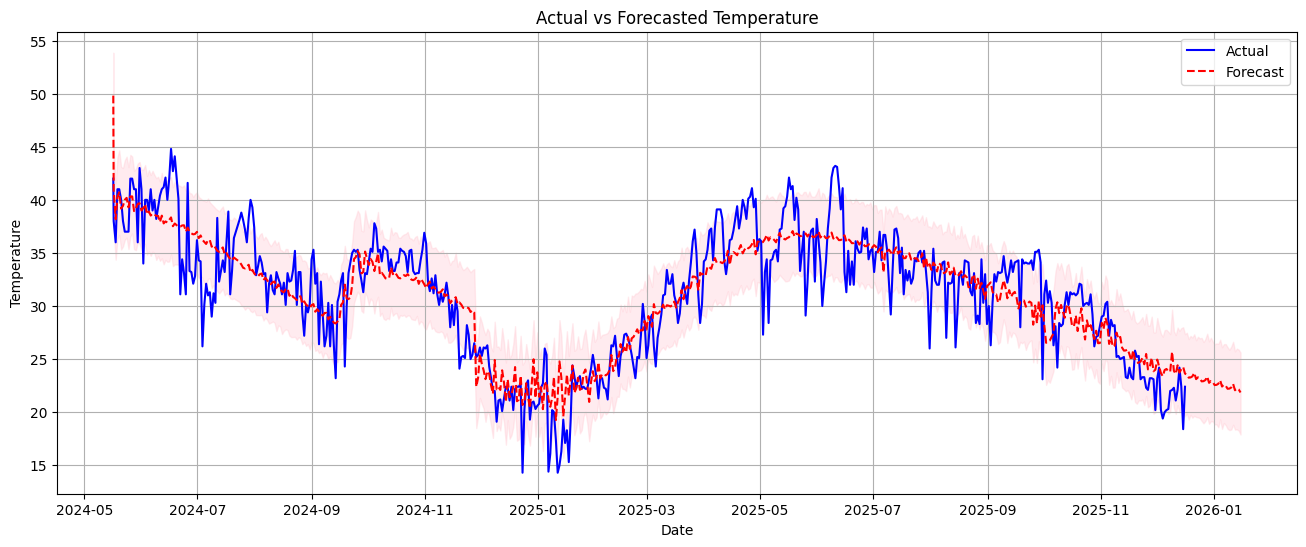

In [107]:
plt.figure(figsize=(16, 6))
plt.plot(data['ds'], data['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red', linestyle='dashed')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Actual vs Forecasted Temperature')
plt.legend()
plt.grid()
plt.show()

# Ensemble Model

Implemented a hybrid ensemble model combining SARIMAX and Prophet forecasts to optimize predictive accuracy by leveraging the strengths of both statistical and additive methodologies

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


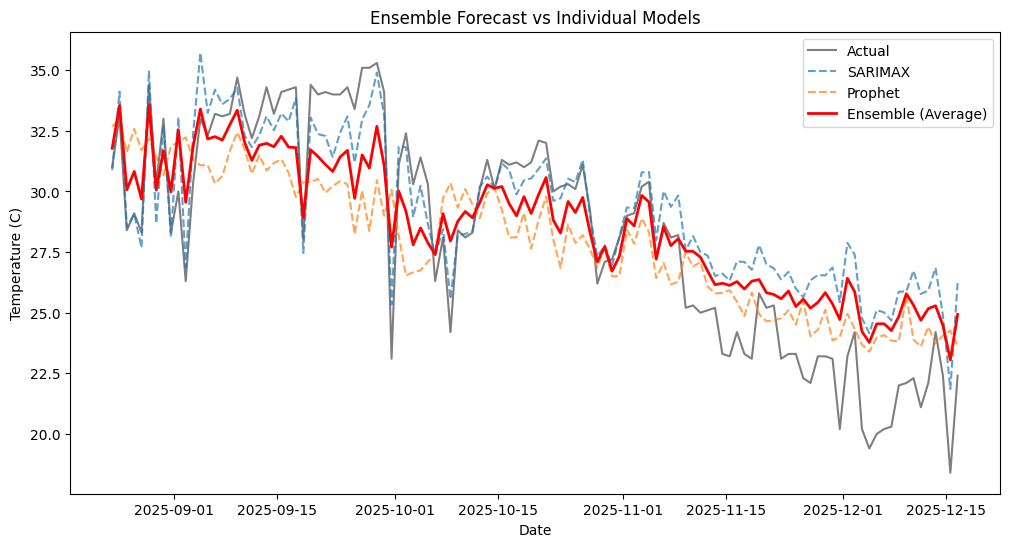

In [109]:
# Retrieve SARIMAX Predictions
sarimax_pred = model_fit.forecast(steps=len(test), exog=X_test)

# Retrieve Prophet Predictions for the same period
prophet_full_forecast = forecast  # This currently holds the Prophet output
test_dates = test.index           # The dates used for testing

# We filter where 'ds' matches our test dates, then set index to 'ds' to align properly
prophet_aligned = prophet_full_forecast[prophet_full_forecast['ds'].isin(test_dates)]
prophet_aligned = prophet_aligned.set_index('ds')

# Extract the predicted values (yhat) ensuring the order matches the test index
prophet_pred_series = prophet_aligned.loc[test_dates]['yhat']

# Create Ensemble (Average)
# Simple averaging of the two models
ensemble_pred = (sarimax_pred + prophet_pred_series.values) / 2

# Evaluate & Visualize
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Calculate Error Metrics for the Ensemble
mae_ensemble = mean_absolute_error(test['temperature_celsius'], ensemble_pred)
rmse_ensemble = np.sqrt(mean_squared_error(test['temperature_celsius'], ensemble_pred))



# Visual Comparison
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['temperature_celsius'], label='Actual', color='black', alpha=0.5)
plt.plot(test.index, sarimax_pred, label='SARIMAX', linestyle='--', alpha=0.7)
plt.plot(test.index, prophet_pred_series, label='Prophet', linestyle='--', alpha=0.7)
plt.plot(test.index, ensemble_pred, label='Ensemble (Average)', linewidth=2, color='red')

plt.title("Ensemble Forecast vs Individual Models")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.legend()
plt.show()

## Ensemble Model Performance

In [105]:
print(f"--- Ensemble Model Performance ---")
print(f"Ensemble MAE  : {mae_ensemble:.3f}")
print(f"Ensemble RMSE : {rmse_ensemble:.3f}")

--- Ensemble Model Performance ---
Ensemble MAE  : 1.921
Ensemble RMSE : 2.274


## Model Comparison

| Model     | Strengths | Limitations |
|----------|-----------|-------------|
| SARIMAX  | Statistical control, interpretable | Needs manual tuning |
| Prophet  | Automatic seasonality, robust | Less flexible for exogenous vars |

SARIMAX provides more control over statistical assumptions,
while Prophet offers faster modeling with automatic seasonality handling.


## Key Insights
- India shows strong seasonal temperature and precipitation patterns.
- Weather anomalies are rare but significant, often linked to extreme events.
- Air quality is strongly influenced by wind speed and humidity.
- Humidity and pressure are key drivers of temperature variability.
- SARIMAX captures short-term dynamics better, while Prophet models long-term trends.
